# **Projet de modélisation statistique**
*Tony Lauze - Amine Razig*

## **1) Importation des données et statistiques descriptives**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import eda

In [2]:
"""Changement de directory pour lire les fichiers"""
import os
dir = os.getcwd() #trouver le directory actuel 
print( f'Le chemin de travail actuel est : {dir}')
os.chdir(dir)


Le chemin de travail actuel est : /Users/aminerazig/Desktop/ENSAE 2A/Seminaire-modelisation-2A-ENSAE


In [3]:
path = 'GWMF_Dataset.DAT'

In [4]:
df = pd.read_csv(path)
df = df[['abs_gwmf', 'tp', 'lnsp', 'temp19', 'temp9', 'temp2', 'temp0', 'u19',
       'u9', 'u2', 'u0', 'v19', 'v9', 'v2', 'v0', 'sza', 'tp_mean', 'tp_sd','balloon']]
df.columns

Index(['abs_gwmf', 'tp', 'lnsp', 'temp19', 'temp9', 'temp2', 'temp0', 'u19',
       'u9', 'u2', 'u0', 'v19', 'v9', 'v2', 'v0', 'sza', 'tp_mean', 'tp_sd',
       'balloon'],
      dtype='object')

In [5]:
df.describe()

abs_gwmf            tp          lnsp        temp19         temp9  \
count  16197.000000  1.619700e+04  16197.000000  16197.000000  16197.000000   
mean       0.000989  2.864759e-04     11.512132    199.817467    247.052769   
std        0.001554  8.639495e-04      0.032755      2.246374      1.635580   
min        0.000000  0.000000e+00     11.023088    192.611940    237.875080   
25%        0.000335  6.938894e-18     11.518892    198.255840    246.173110   
50%        0.000614  2.459846e-05     11.522152    199.836960    247.168410   
75%        0.001137  1.636641e-04     11.524135    201.335070    248.053240   
max        0.072712  2.541273e-02     11.549719    207.770570    252.279100   

              temp2         temp0           u19            u9            u2  \
count  16197.000000  16197.000000  16197.000000  16197.000000  16197.000000   
mean     288.693248    299.461071      2.737127      1.991811     -2.205544   
std        1.688561      2.094615      6.953460     10.229109      5.754826   
min      270.309480    276.263500    -21.297882    -20.244250    -17.597311   
25%      288.144840    298.538970     -1.579005     -5.605468     -6.175981   
50%      288.880460    299.854370      3.421588      0.616856     -2.870982   
75%      289.539180    300.777100      7.707038      8.695124      0.832136   
max      295.087300    309.417700     23.228626     35.223260     27.219698   

                 u0           v19            v9            v2            v0  \
count  16197.000000  16197.000000  16197.000000  16197.000000  16197.000000   
mean      -1.838503      0.094881      0.525721     -0.904514     -0.008962   
std        3.817468      3.238477      5.275595      3.048480      3.266805   
min      -11.426922    -11.014263    -21.263680    -17.654207    -13.621062   
25%       -4.783611     -2.124521     -2.758159     -2.732455     -2.043558   
50%       -2.125209      0.118922      0.378418     -0.788899     -0.004423   
75%        0.299289      2.243451      3.644465      1.126128      2.335671   
max       14.437126     14.463321     18.420069     12.390946      8.689446   

                sza       tp_mean         tp_sd       balloon  
count  16197.000000  16197.000000  16197.000000  16197.000000  
mean      88.395843      0.000285      0.000413      4.184355  
std       45.214723      0.000464      0.000672      2.354477  
min        3.610009      0.000000      0.000000      1.000000  
25%       47.429510      0.000020      0.000031      2.000000  
50%       88.478490      0.000087      0.000123      4.000000  
75%      129.414080      0.000358      0.000546      6.000000  
max      176.084260      0.006860      0.007757      8.000000

La variable cible est **"abs_gwmf"**, valeur absolue de la quantité de mouvement d'ondes internes de gravité, quantité clef renseignant sur les effets de ces ondes. Ces observations ont été obtenues grâce à des ballons pressurisés circulant dans l'atmosphère à une altitude de 18 à 20 km (durée de vie 2 à 3 mois).

Les variables explicatives, provenant de modèles numériques de climat (ECMWF), sont :

    => tp : précipitations,
    => lnsp : logarithme de la pression de surface,
    => temp19, temp9, temp2, temp0 : la température, à plusieurs altitudes,
    => u19,u9,u2,u0,v19,v9,v2,v0 : le vent, à plusieurs altitudes (il y a les 2 composantes est-ouest et nord-sud),
    => sza : solar zenith angle = angle entre la direction du zénith et la direction du Soleil,
    => tp_mean : moyenne précipitations,
    => tp_sd : écart-type précipitations,
    
De plus, "balloon" indique le numéro du ballon qui a permis d'obtenir l'observation "abs_gwmf".


In [6]:
# Analyse des valeurs manquantes du data frame : 
eda.create_unique(df)

Column_name Data_type  Number_of_unique  Number_of_missing  \
0     abs_gwmf   float64             15889                  0   
1           tp   float64              3206                  0   
2         lnsp   float64             10460                  0   
3       temp19   float64             15784                  0   
4        temp9   float64             15531                  0   
5        temp2   float64             14986                  0   
6        temp0   float64             15263                  0   
7          u19   float64             16060                  0   
8           u9   float64             16078                  0   
9           u2   float64             16034                  0   
10          u0   float64             15936                  0   
11         v19   float64             16038                  0   
12          v9   float64             16067                  0   
13          v2   float64             15991                  0   
14          v0   float64             16004                  0   
15         sza   float64             16188                  0   
16     tp_mean   float64             12896                  0   
17       tp_sd   float64             15582                  0   
18     balloon     int64                 8                  0   

    Percentage_of_missing               Unique_values  
0                     0.0  More than 15 unique values  
1                     0.0  More than 15 unique values  
2                     0.0  More than 15 unique values  
3                     0.0  More than 15 unique values  
4                     0.0  More than 15 unique values  
5                     0.0  More than 15 unique values  
6                     0.0  More than 15 unique values  
7                     0.0  More than 15 unique values  
8                     0.0  More than 15 unique values  
9                     0.0  More than 15 unique values  
10                    0.0  More than 15 unique values  
11                    0.0  More than 15 unique values  
12                    0.0  More than 15 unique values  
13                    0.0  More than 15 unique values  
14                    0.0  More than 15 unique values  
15                    0.0  More than 15 unique values  
16                    0.0  More than 15 unique values  
17                    0.0  More than 15 unique values  
18                    0.0    [1, 2, 3, 4, 5, 6, 7, 8]

In [7]:
# Création de 8 sous dataframe pour chaque "balloon" : 

# METHODE 1 : celle la nous permet de creer une par une les nouveelles variables : 
for i in range (1,8+1): 
    globals()[f'balloon_{i}'] = df[df['balloon']==i]

# METHODE 2 : on creer un dictionnaire qui va contenir toute les " sous dataframes" souhaité : 
dict_balloon = {}
for i in range (1,8+1): 
    dict_balloon[i]= df[df['balloon']==i]

In [14]:
dict_balloon[1]['abs_gwmf']
#df['abs_gwmf']

0       0.004419
1       0.001380
2       0.000965
3       0.000584
4       0.000638
          ...   
2560    0.000332
2561    0.000426
2562    0.000261
2563    0.000191
2564    0.000309
Name: abs_gwmf, Length: 2565, dtype: float64

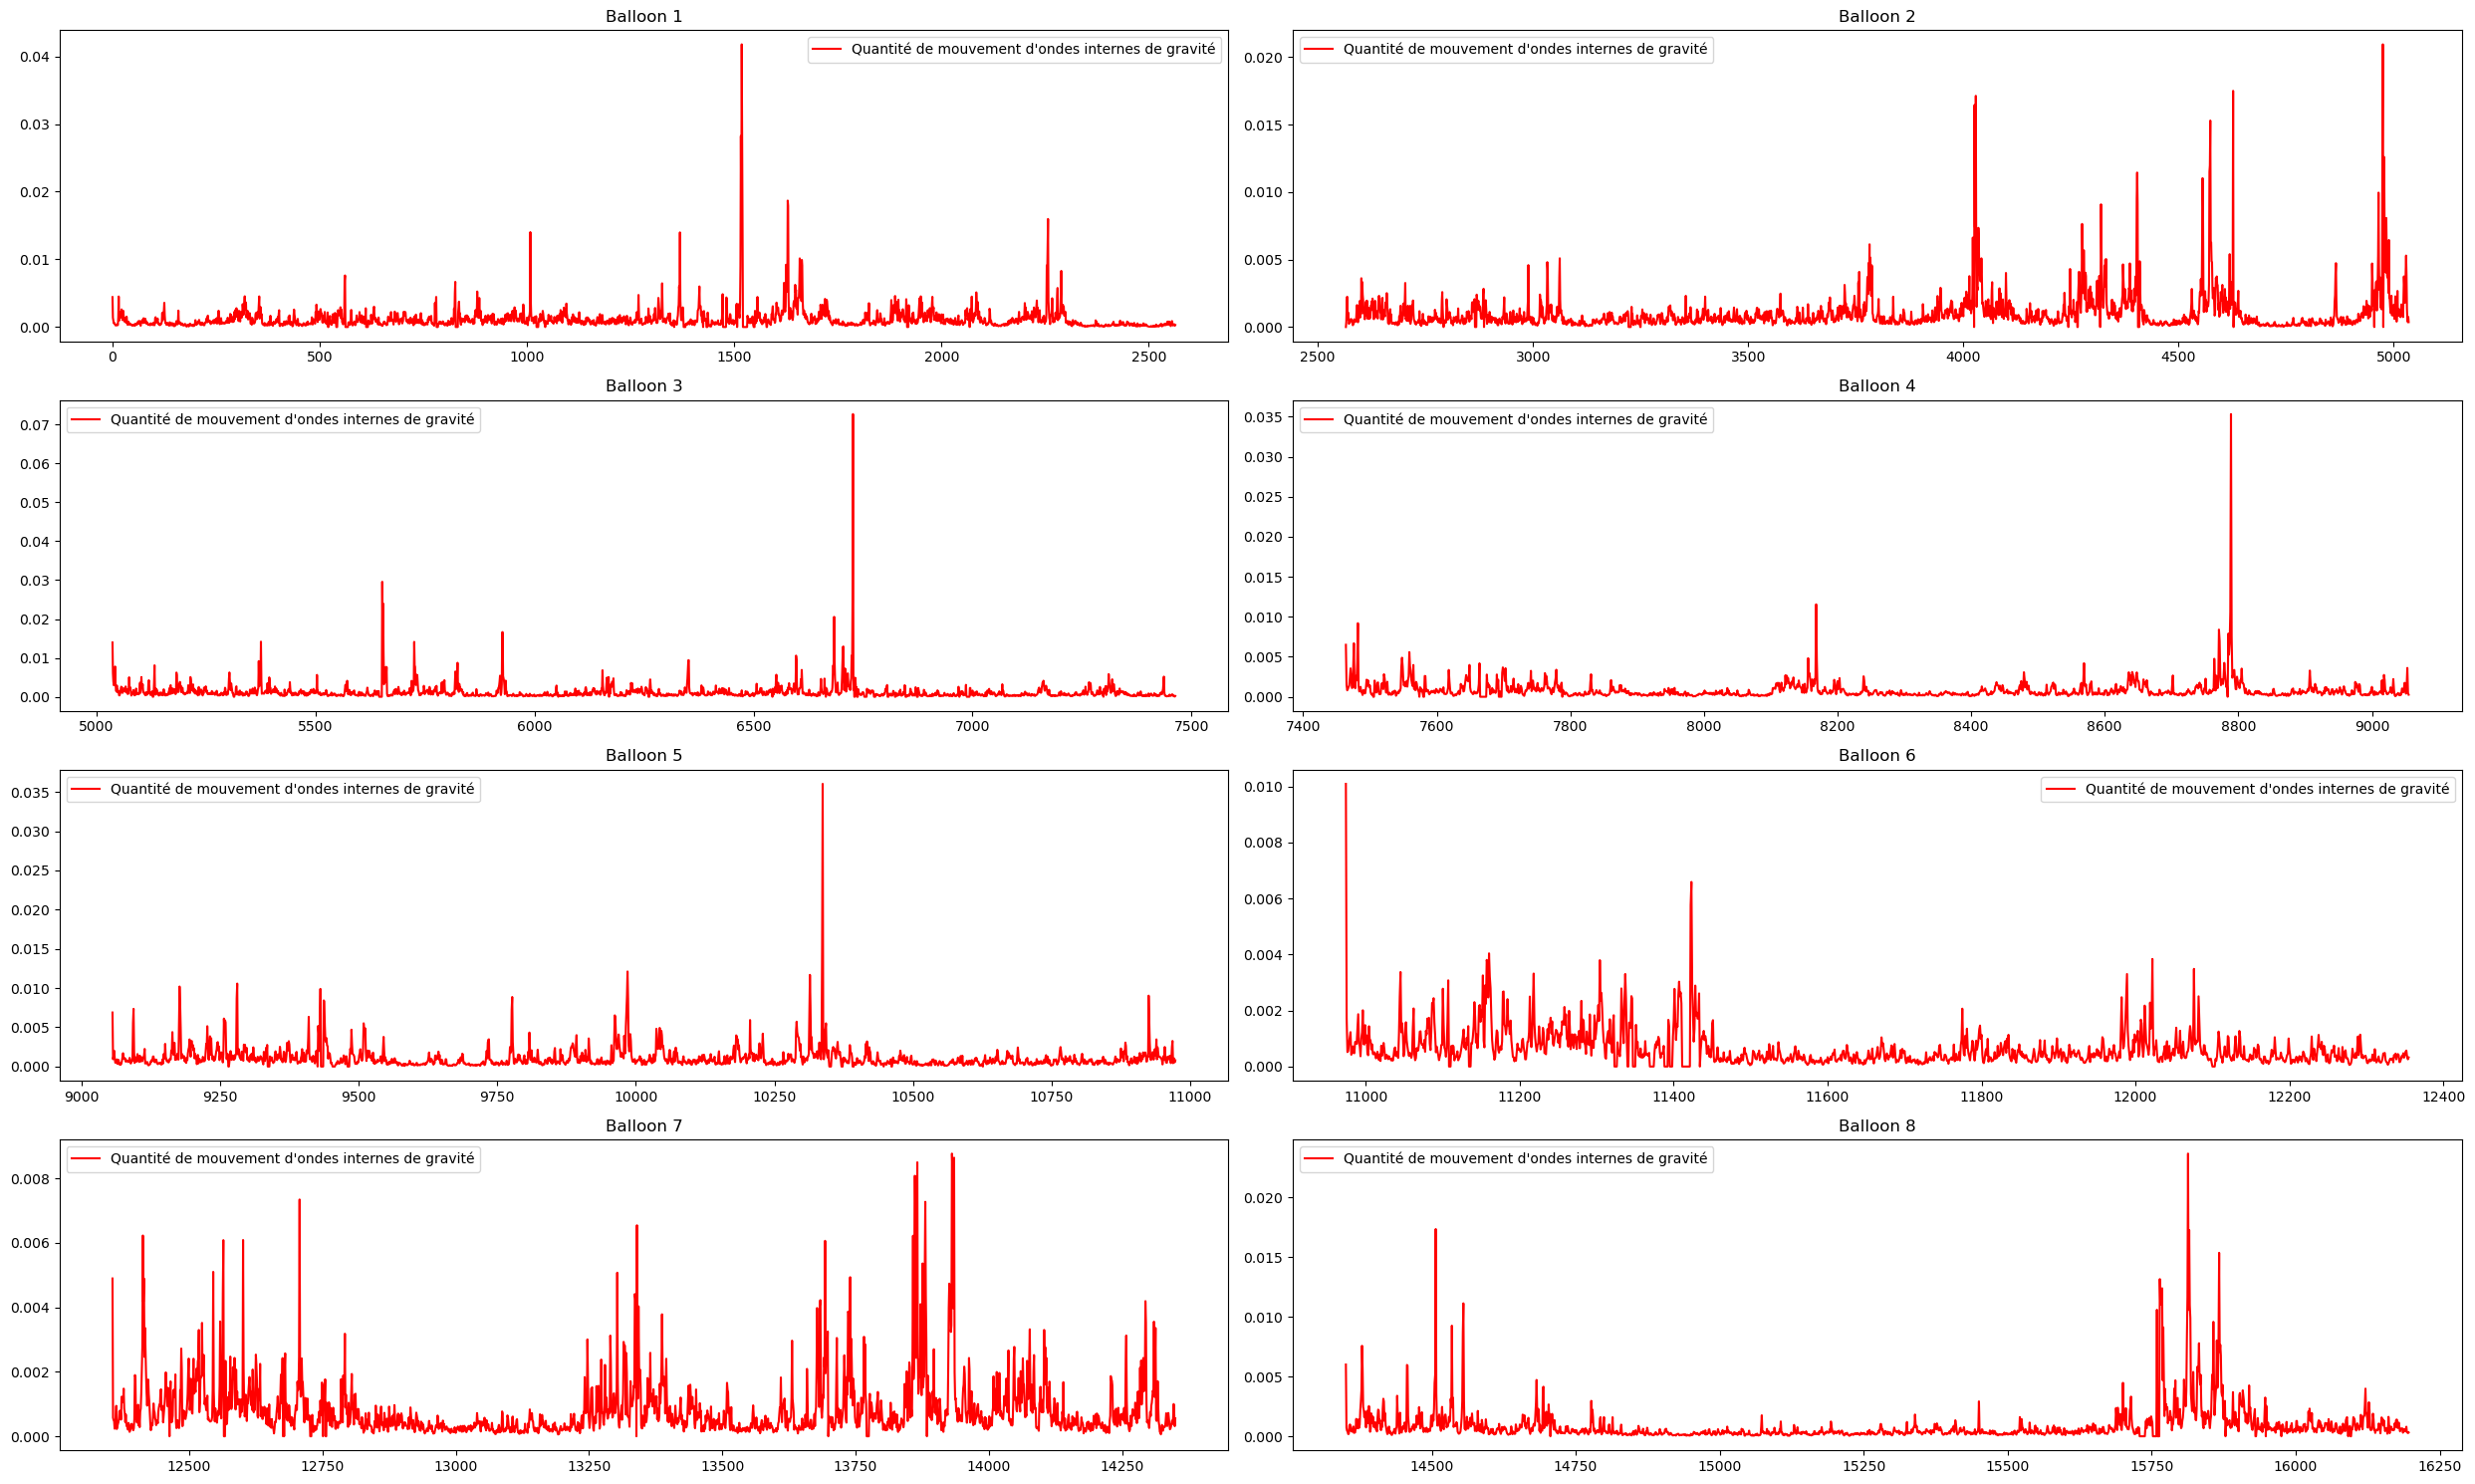

In [29]:
fig, axs = plt.subplots(4, 2, figsize=(25, 15))

for i in range(8):
    row, col = i // 2, i % 2  # Calculate the correct row and column for subplots
    axs[row, col].plot(dict_balloon[i+1]['abs_gwmf'], color='r', label="Quantité de mouvement d'ondes internes de gravité")
    axs[row, col].legend()
    axs[row, col].set_title("Balloon {}".format(i+1))

plt.tight_layout()
plt.show()



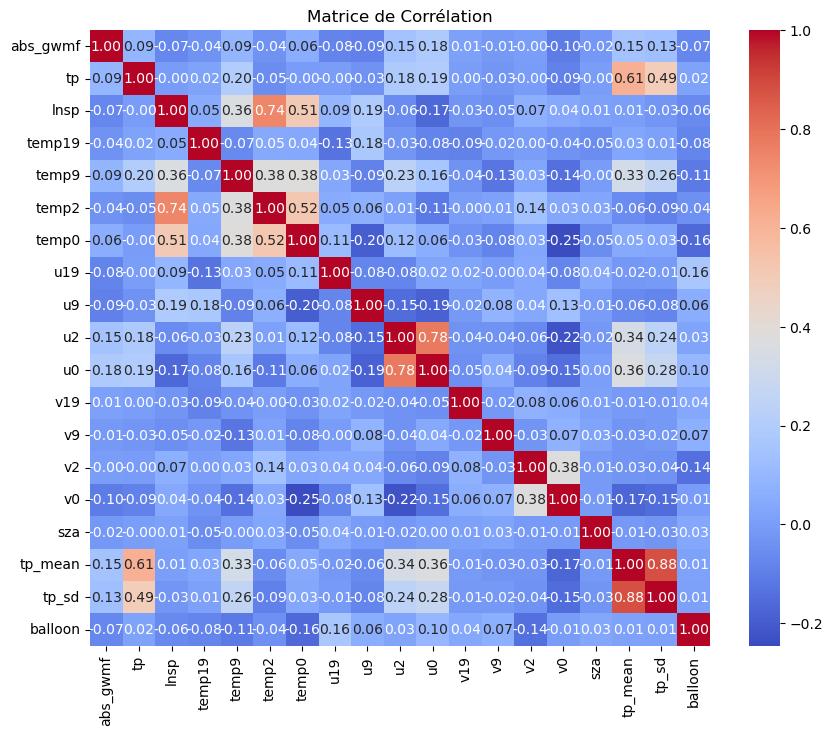

In [42]:
"""Matrice de corrélation des variables"""

import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

# Créer un heatmap de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation')
plt.savefig('matrice_corr.jpeg')  # Vous pouvez changer le format ici si besoin
plt.show()

### Plan d'exploration : 

    -> Préparation des données

    -> Feature engineering : créer de nouvelles variables (features) qui pourraient aider à améliorer la prédiction. Par exemple, des variables telles que les retards (lags) de la variable cible, des moyennes mobiles, ou des indicateurs de tendance pourraient être utiles.

    -> Sélection des variables : Il est souvent utile de sélectionner un sous-ensemble des variables explicatives les plus pertinentes pour la prédiction. Cela peut être fait à travers des méthodes statistiques (comme le test chi² pour les variables catégorielles, l'analyse de la variance pour les variables continues) ou des méthodes plus complexes comme la sélection de caractéristiques basée sur des modèles de machine learning.

        -> Division des données (train test) : 
        ->                                     Par exemple apprendre sur les données de 7 ballons et tester sur le ballon restant, ceci pour chaque ballon.
        ->                                     Est-ce qu'il y a des ballons pour lesquels la prédiction fonctionne mieux que pour d'autres ?


            -> Choix du modèle 

                -> Entraînement du modèle 

                    -> Évaluation du modèle : performance du modèle sur l'ensemble de test à l'aide de métriques appropriées
                    ->                        corrélation entre valeurs prédites et vraies valeurs, en plus de regarder une erreur.

                        -> Optimisation et ajustements
                        
                            -> Prédictions

# Random Forest

L'idée à présent est de mettre en place le modele random forrest, de l'entrainer sur 7 ballons et de le tester sur le ballon restant. La démarche est similaire à celle de la validation croisé. 

### Pour chaque ballon nous allons : 
1. Entraîner un modèle sur les données des 7 autres ballons.
2. Prédire la variable 'abs_gwmf' pour le ballon actuel.
3. Afficher le graphique des valeurs réelles contre les prédictions.
4. Afficher un tableau avec les importances des différentes variables du modèle, vous permettant de voir quelles variables ont le plus d'influence sur les prédictions.

Erreur pour le ballon 1: 3.175290347686152e-06


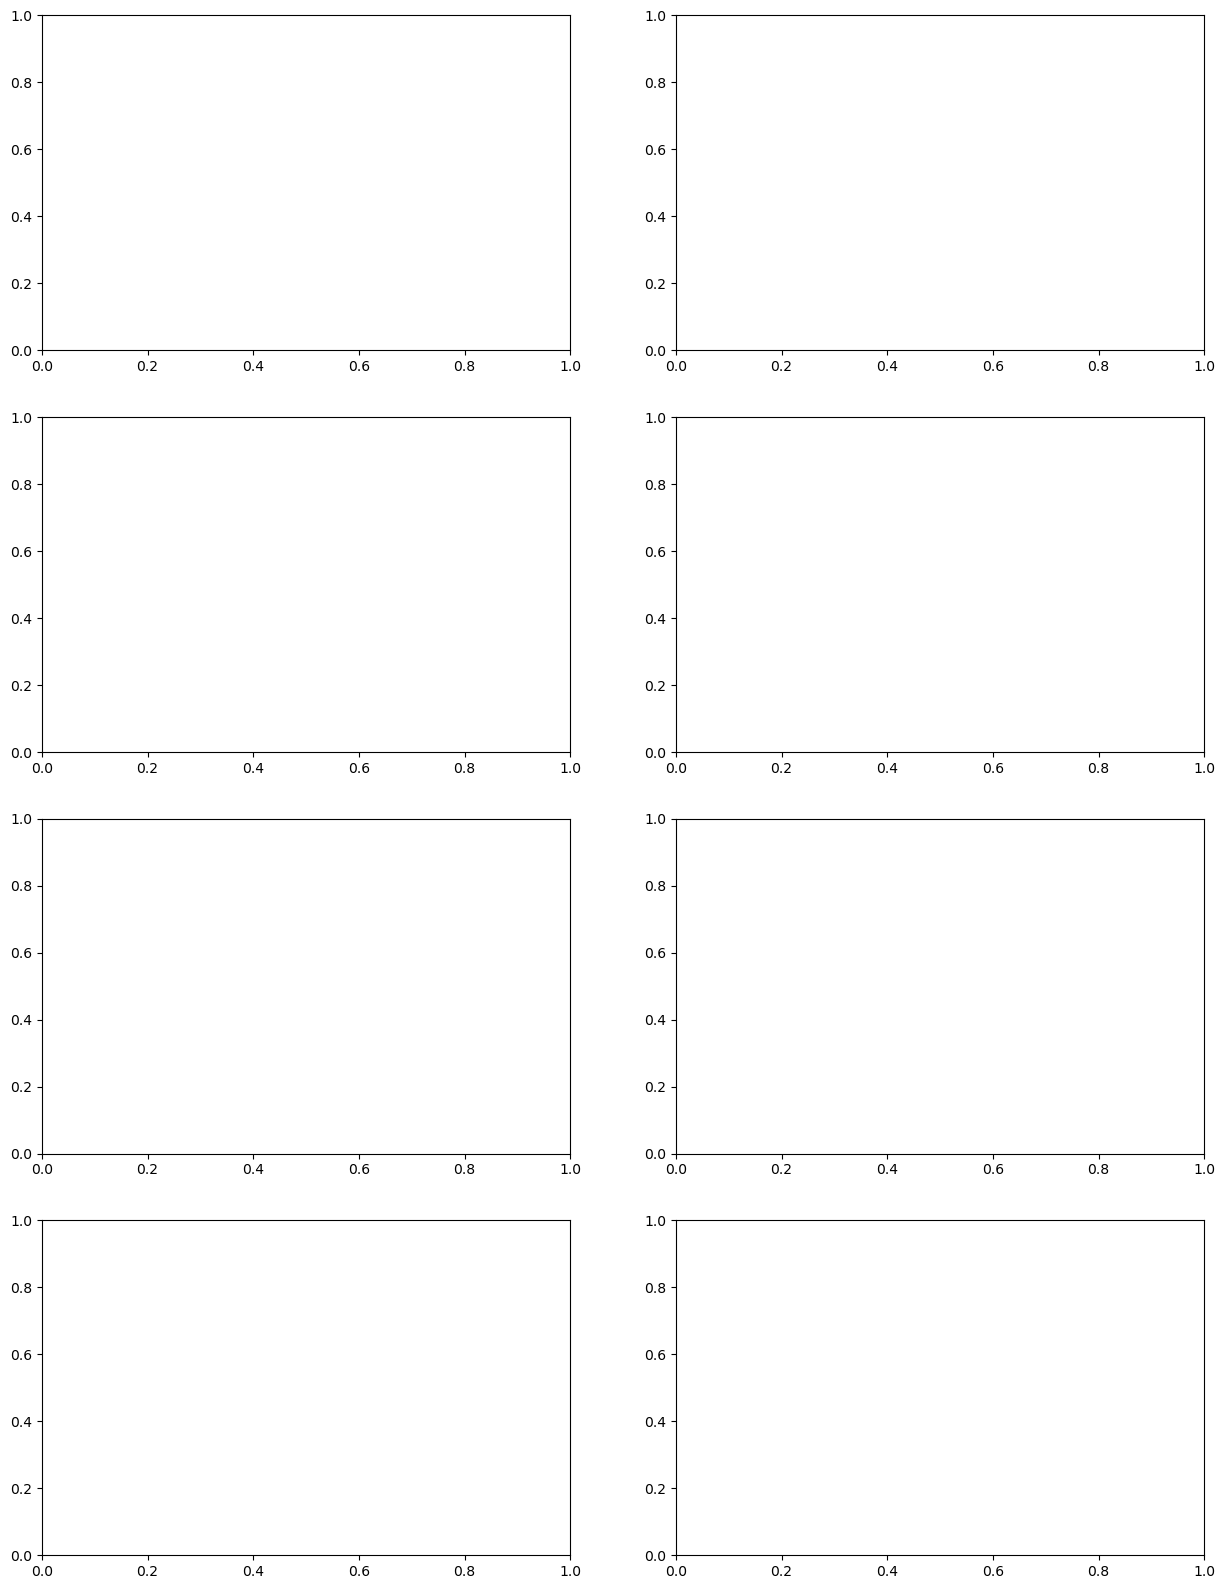

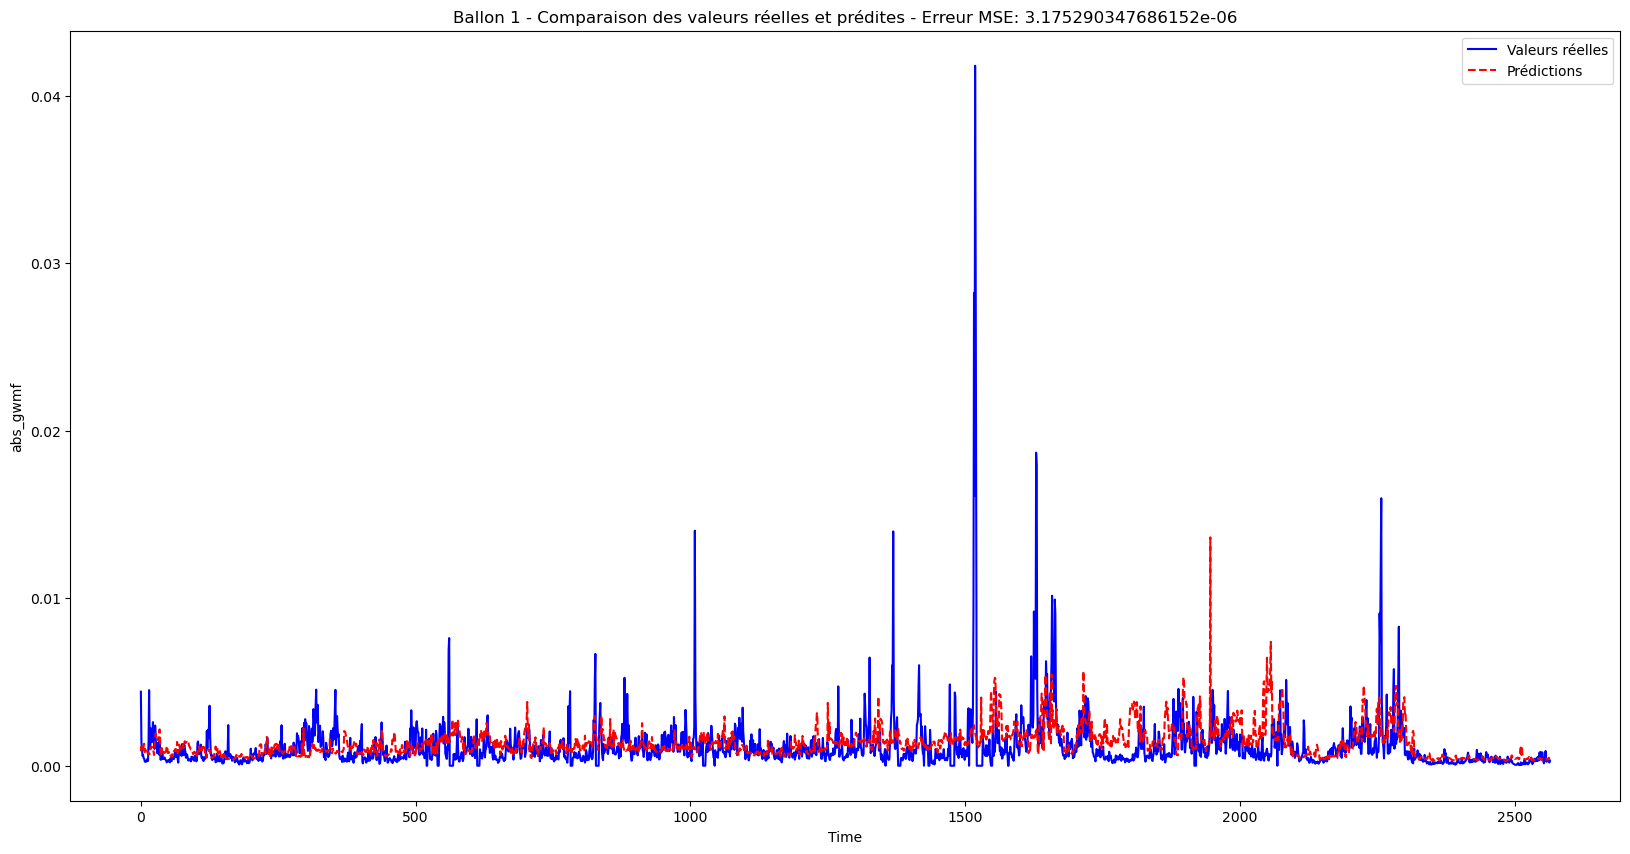

Erreur pour le ballon 2: 2.7654125503865916e-06


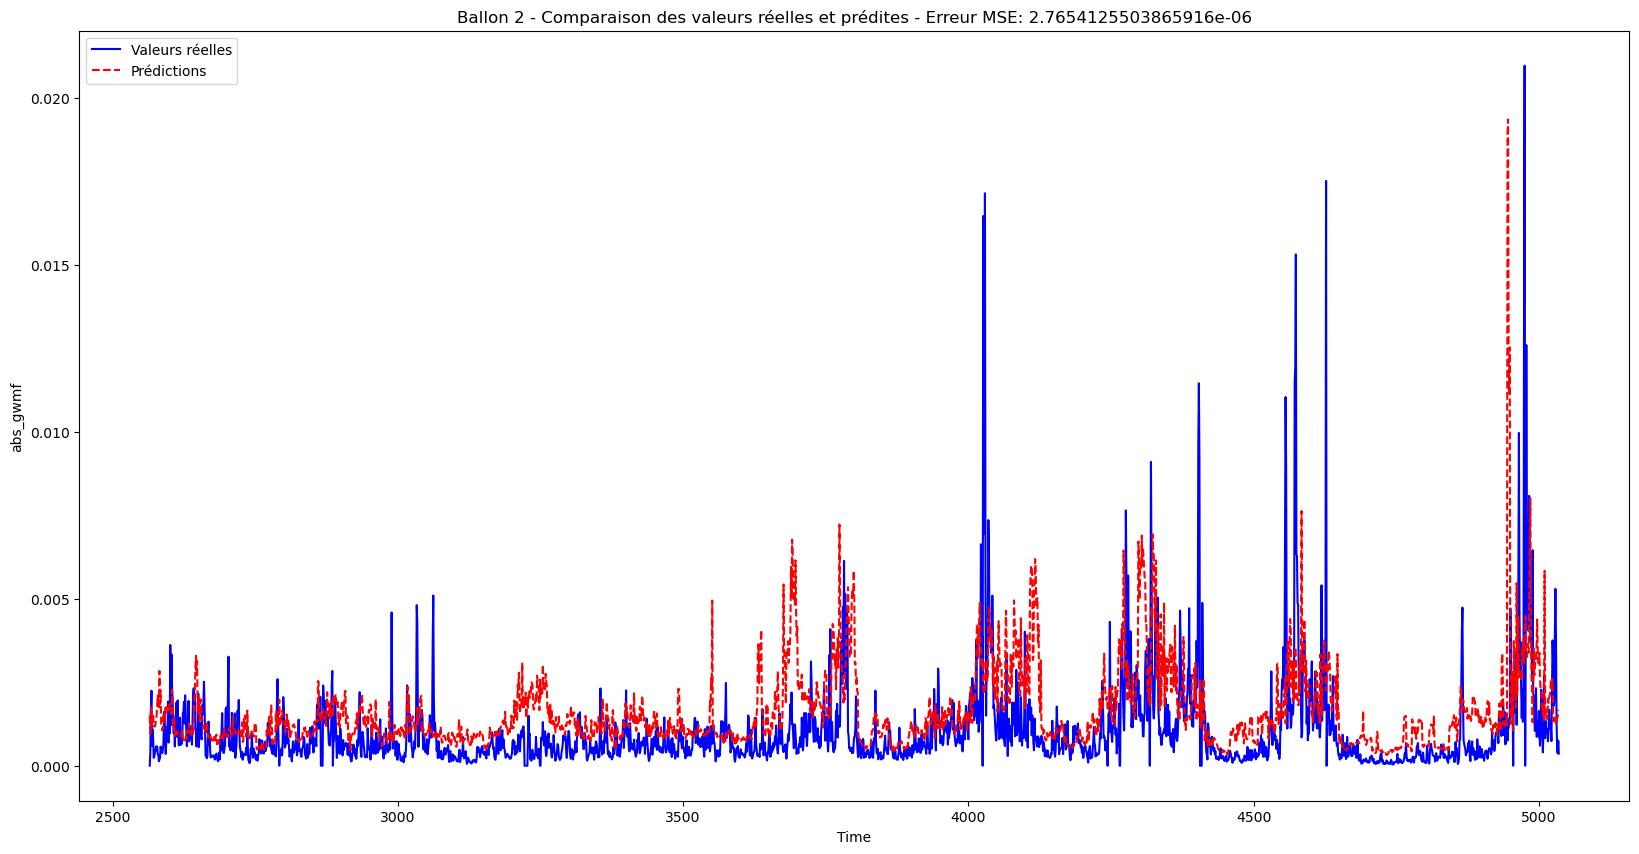

Erreur pour le ballon 3: 5.266878394520757e-06


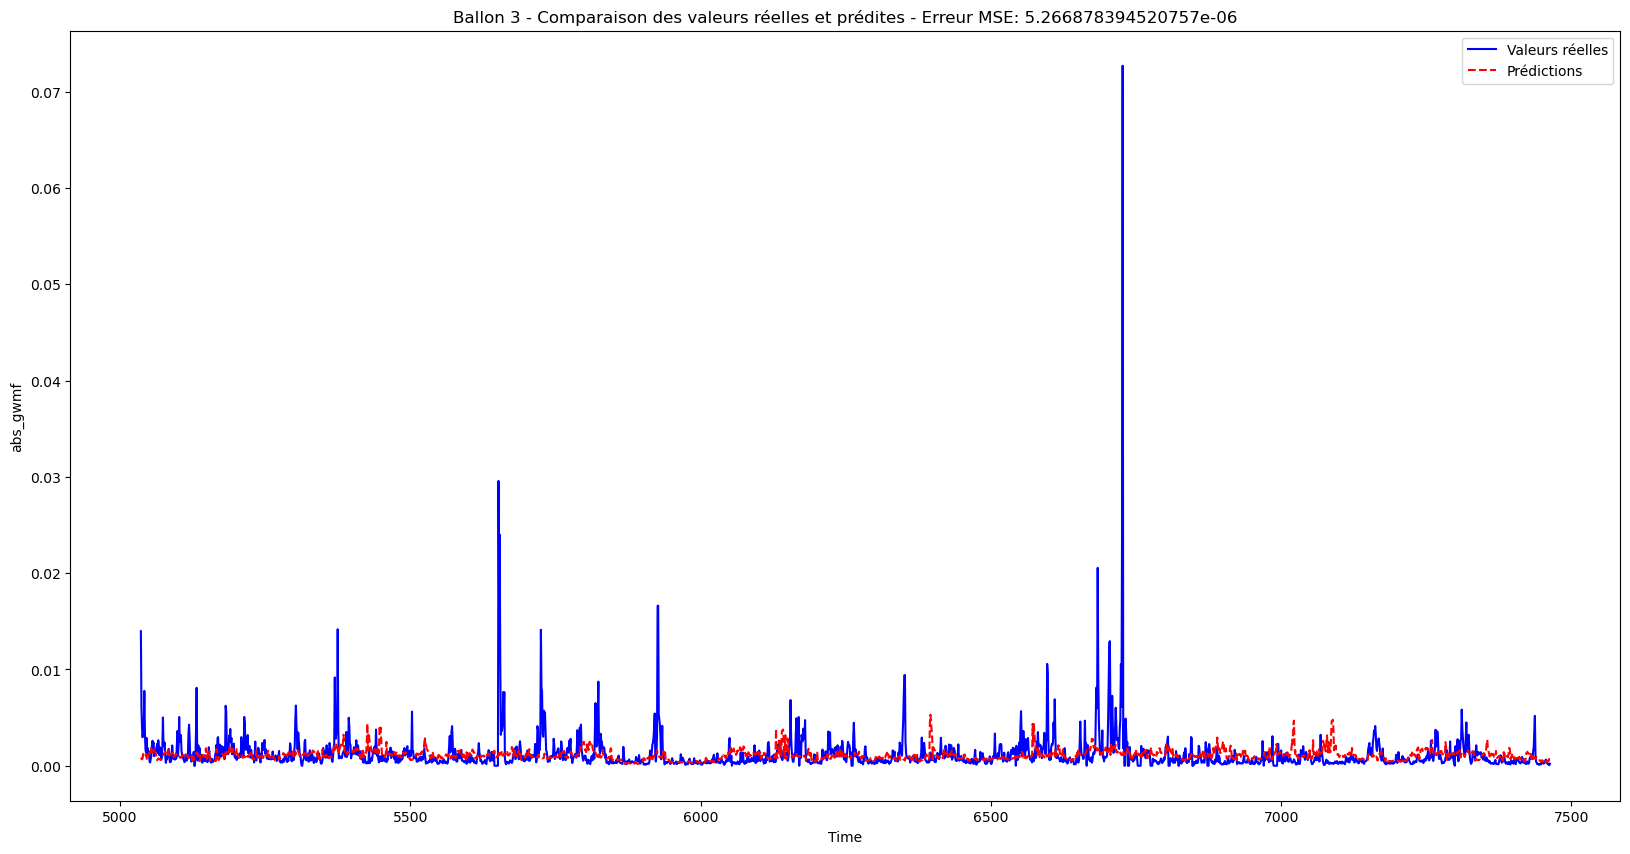

Erreur pour le ballon 4: 1.7387602818844146e-06


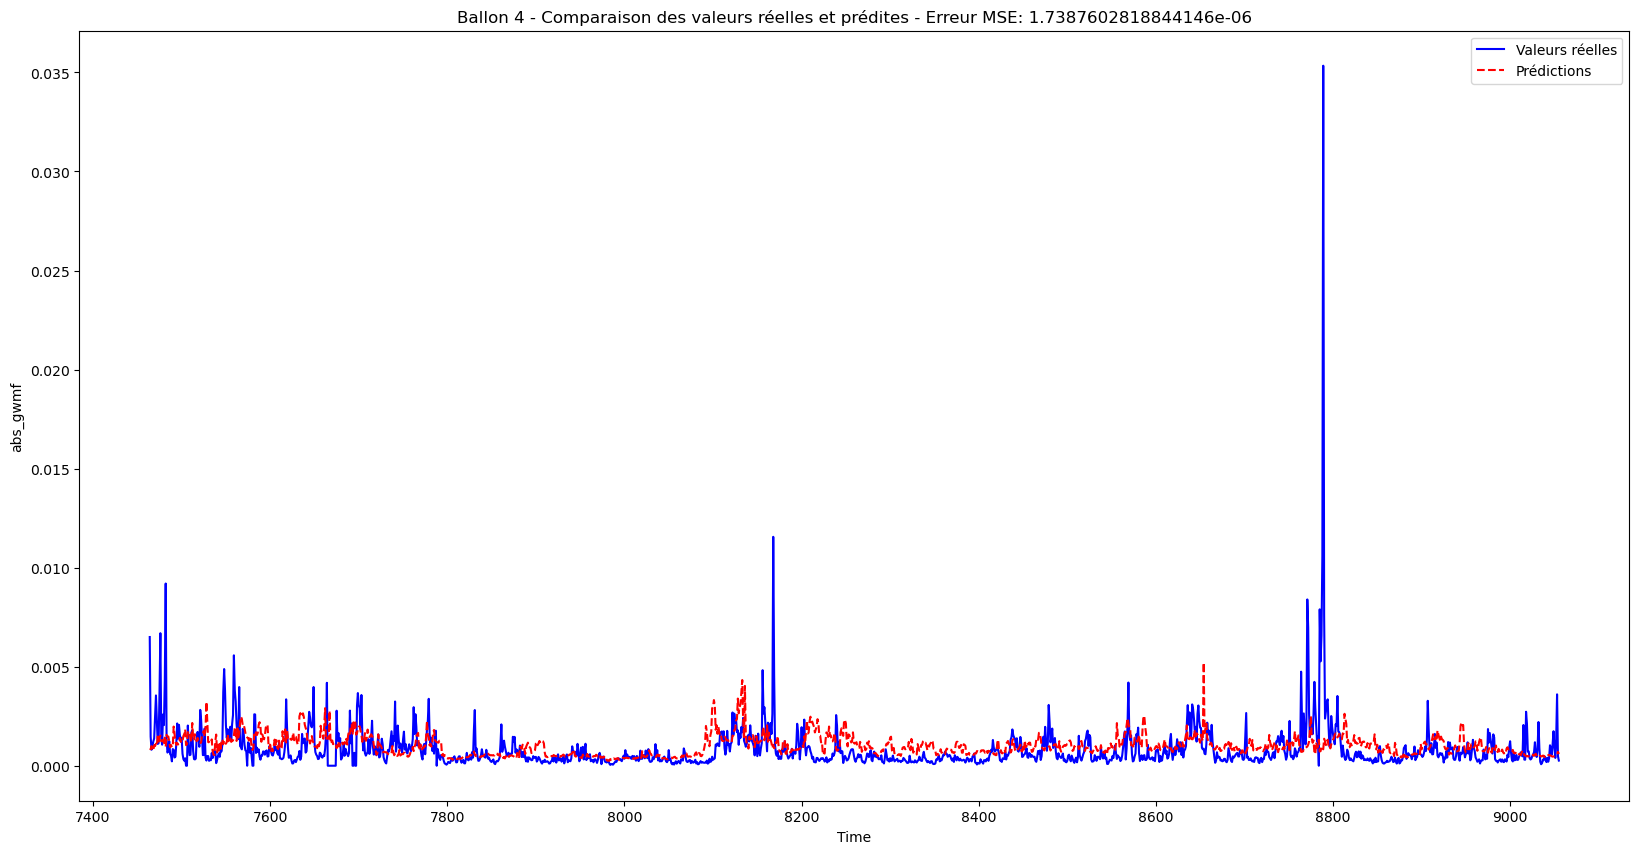

Erreur pour le ballon 5: 2.311025075115434e-06


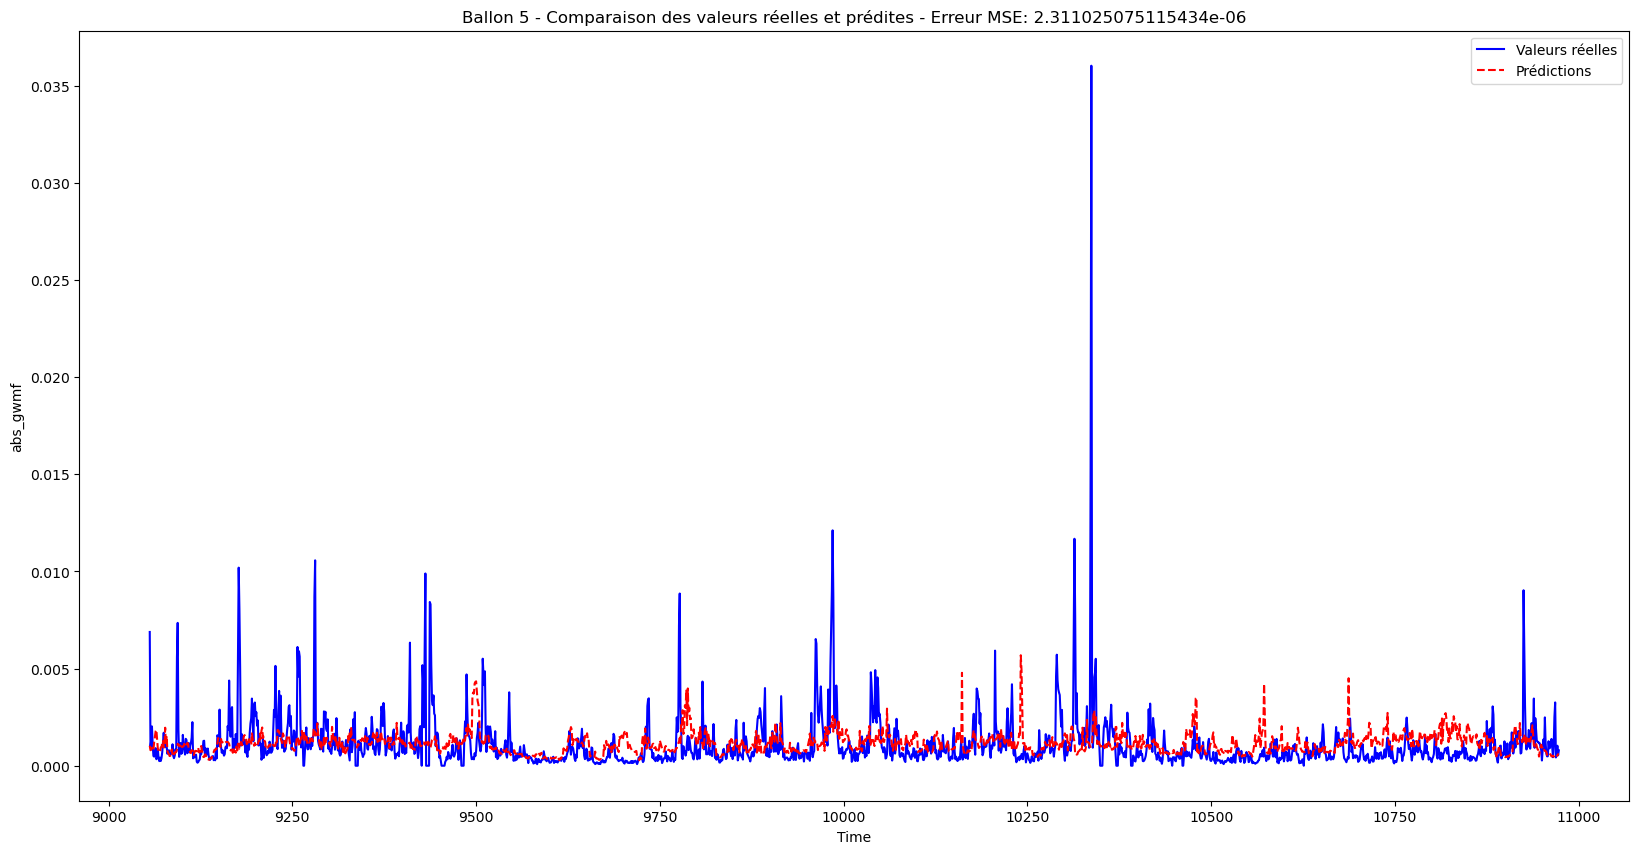

Erreur pour le ballon 6: 1.1371158036155083e-06


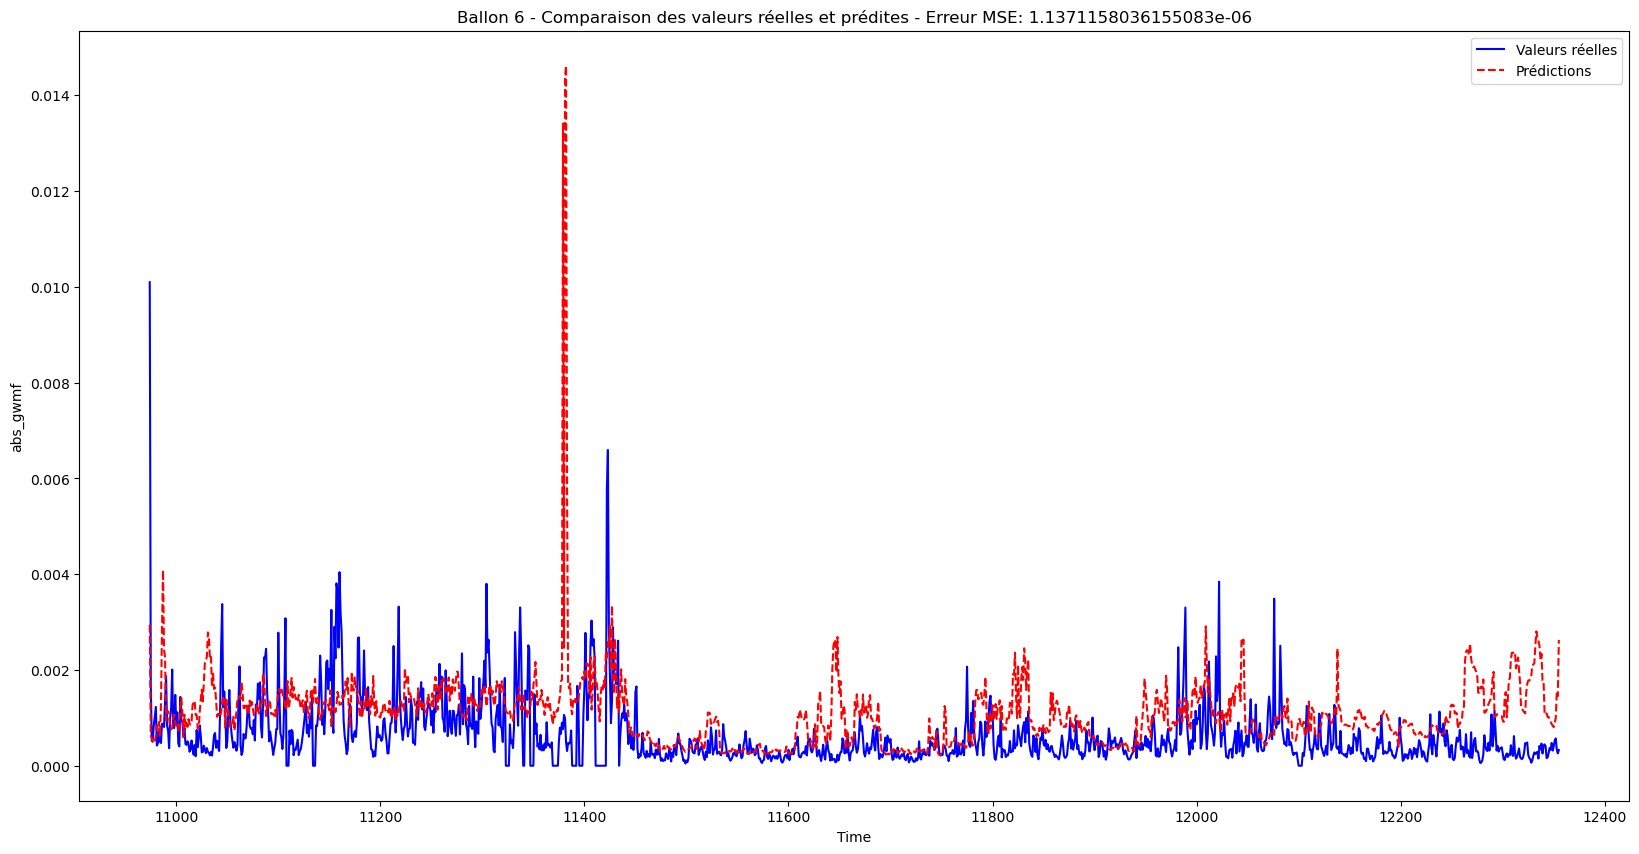

Erreur pour le ballon 7: 1.303239724416542e-06


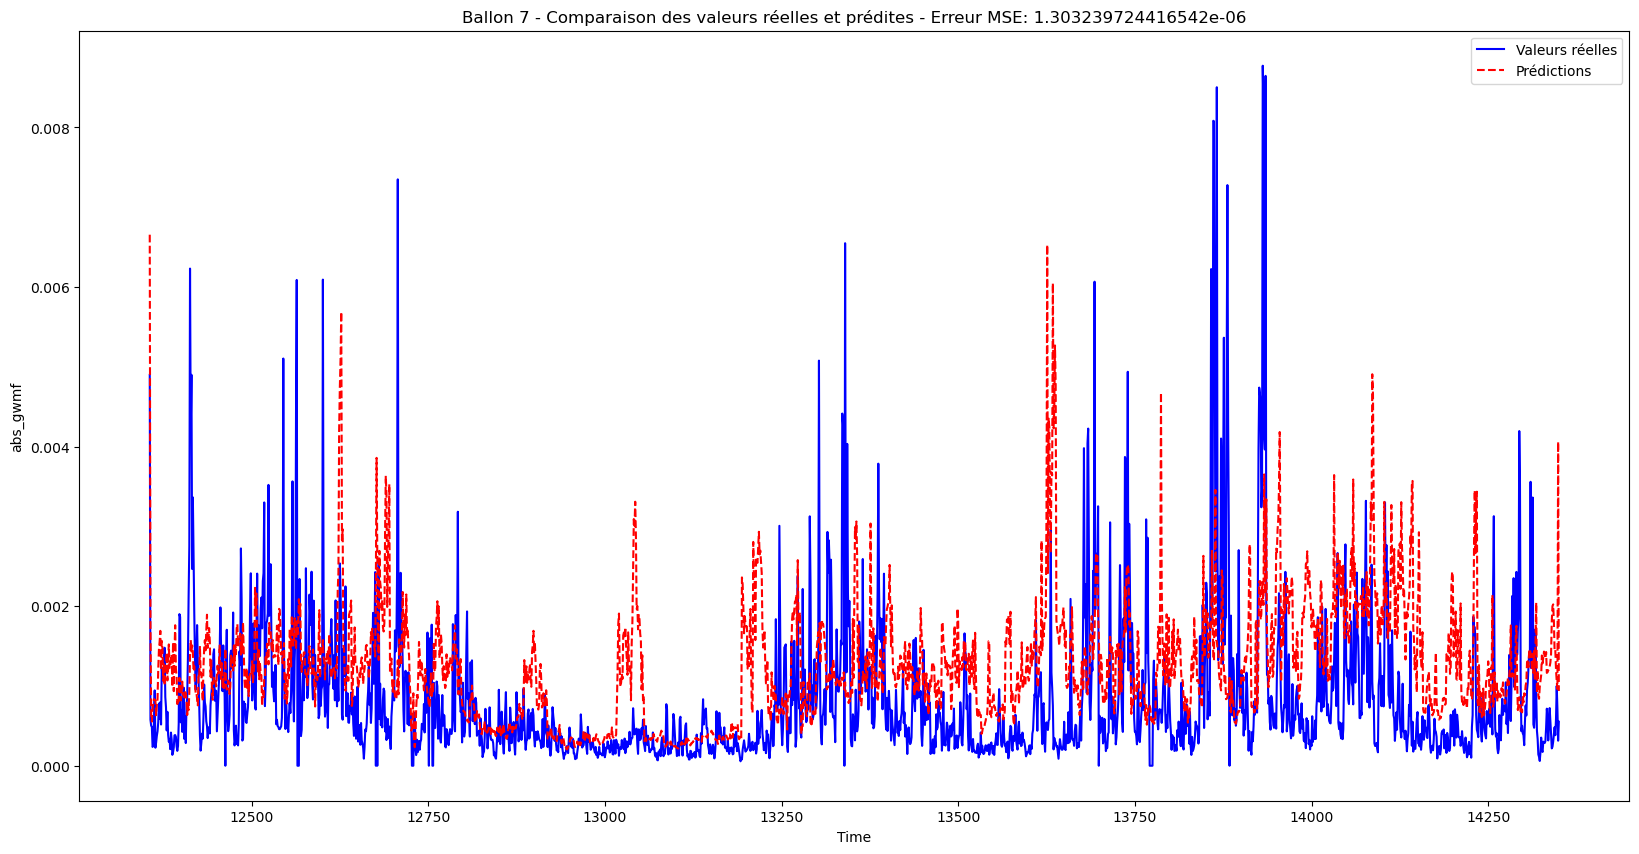

Erreur pour le ballon 8: 2.03106098157564e-06


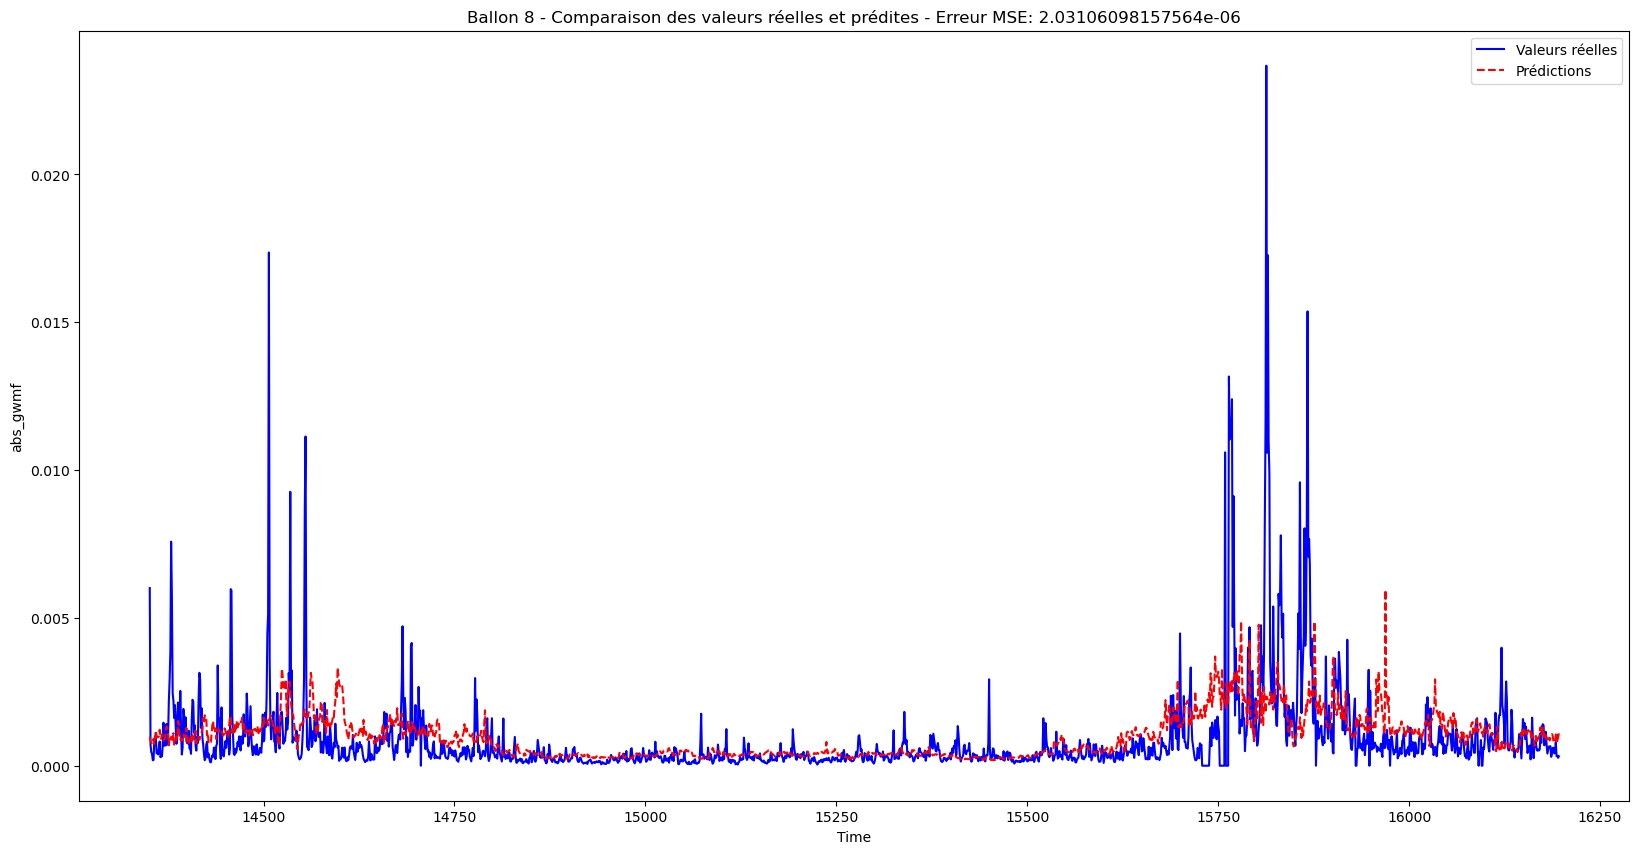

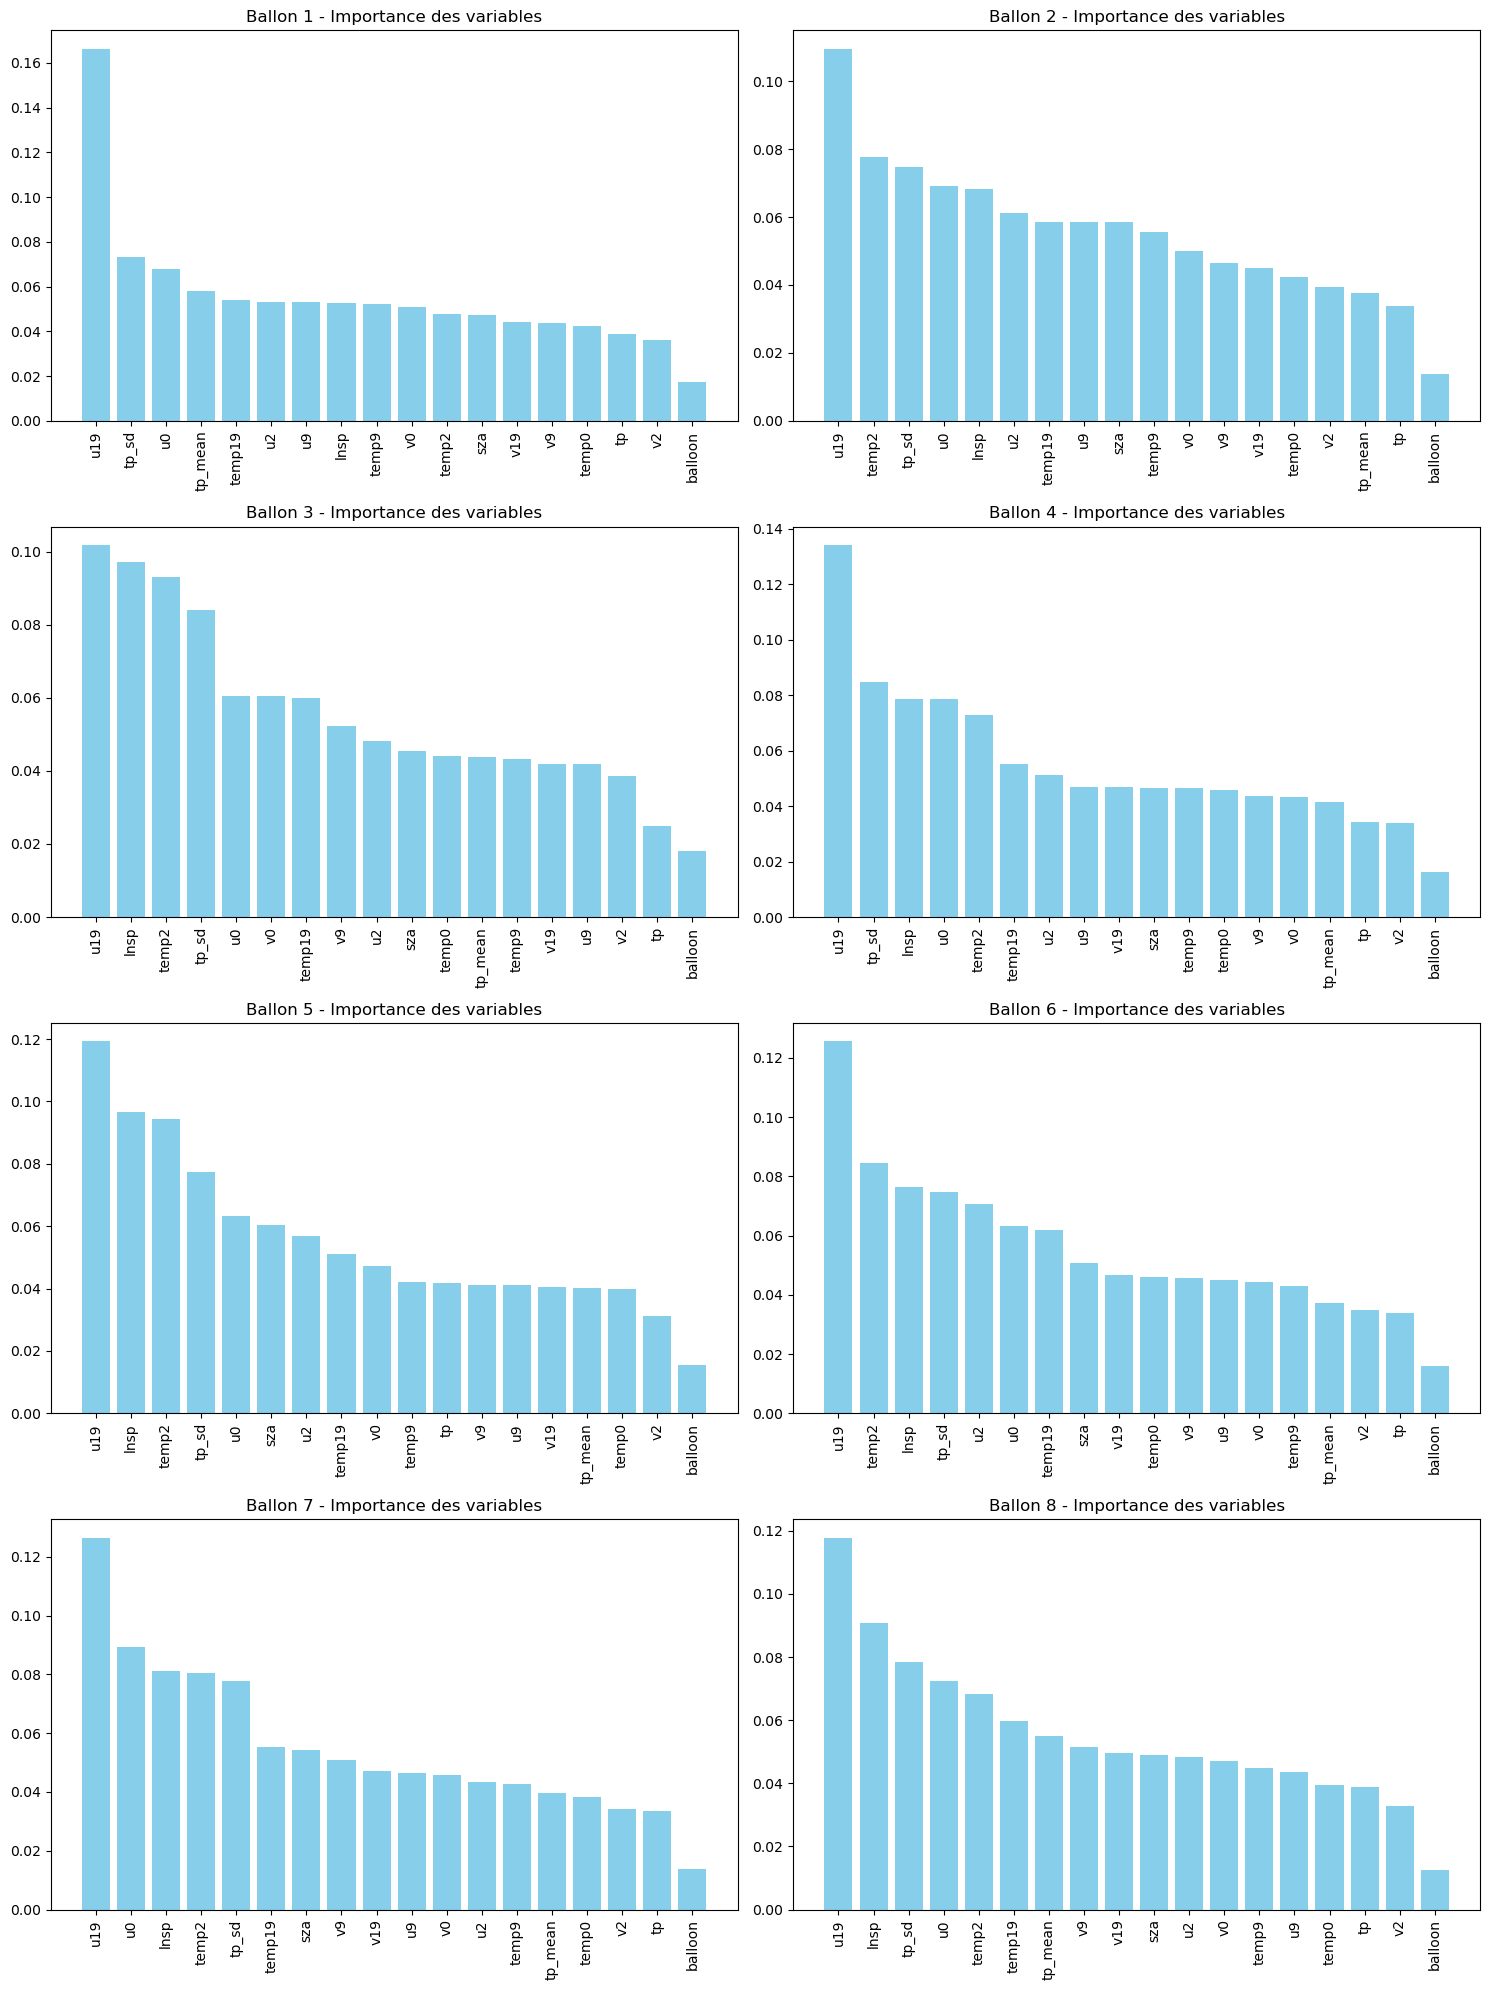

Sur l'intégralité des 8 ballons, l'erreur moyenne est: 2.46609789490013e-06


In [40]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score

# modèle
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Stock des erreurs pdans une liste
errors = []

fig_importances, axs_importances = plt.subplots(4, 2, figsize=(15, 20))  # 4 lignes, 2 colonnes
axs_importances = axs_importances.flatten()


for i in range(1, 9):
    # Pour chaque ballons on selection les ballons restant pour constituer les données d'entrainement 
    train_data = pd.DataFrame()
    for j in range(1, 9):
        if j != i:
            train_data = pd.concat([train_data, dict_balloon[j]], ignore_index=True)

    
    test_data = dict_balloon[i]
    
    # Séparer les caractéristiques et la cible
    X_train = train_data.drop('abs_gwmf', axis=1)
    y_train = train_data['abs_gwmf']
    X_test = test_data.drop('abs_gwmf', axis=1)
    y_test = test_data['abs_gwmf']
    
    # Entraînement du modèle
    model.fit(X_train, y_train)
    
    # Prédiction sur le ballon de test
    predictions = model.predict(X_test)
    
    # Erreur quadratique moyenne
    error = mean_squared_error(y_test, predictions)
    errors.append(error)

    print(f"Erreur pour le ballon {i}: {error}")

    # Plot réel vs prédiction pour chaque ballon
    plt.figure(figsize=(20,10))  # Taille du graphique
    plt.plot(test_data.index, y_test, label='Valeurs réelles', color='blue')
    plt.plot(test_data.index, predictions, label='Prédictions', color='red', linestyle='--')
    plt.title(f'Ballon {i} - Comparaison des valeurs réelles et prédites - Erreur MSE: {error}')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('abs_gwmf')
    plt.show() 

    # Importance des variables : 
    feature_importances = pd.DataFrame(model.feature_importances_,
                                       index = X_train.columns,
                                       columns=['importance']).sort_values('importance', ascending=False)
    axs_importances[i-1].bar(feature_importances.index, feature_importances['importance'], color='skyblue')
    axs_importances[i-1].set_title(f'Ballon {i} - Importance des variables')
    axs_importances[i-1].tick_params(axis='x', rotation=90)  # Rotation des labels pour une meilleure lisibilité

plt.figure(fig_importances)
plt.tight_layout()
plt.show() 

# l'erreur moyenne sur les 8 tests
print(f"Sur l'intégralité des 8 ballons, l'erreur moyenne est: {np.mean(errors)}")

##### TEMPS D'EXECUTION : 
#   environ 40 secondes par ballon


## **Fine-Tuning du Randomforest**

In [ ]:
#FINE TUNING DU RANDOM FOREST / 

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# hyperparamètres à rechercher avec Randomized Search
random_params = {
    'n_estimators': randint(100, 1000),
    'max_features': ['auto', 'sqrt'],
    'max_depth': randint(10, 100),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(rf, param_distributions=random_params, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)


best_random_params = random_search.best_params_

# grille plus précise autour des meilleurs paramètres trouvés
param_grid = {
    'n_estimators': [best_random_params['n_estimators'] - 50, best_random_params['n_estimators'], best_random_params['n_estimators'] + 50],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [best_random_params['max_depth'] - 10, best_random_params['max_depth'], best_random_params['max_depth'] + 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True]
}

# meilleurs hyperparamètres autour des meilleurs paramètres trouvés par Randomized Search
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

# Nouveau modèle Random Forest avec les meilleurs paramètres
best_rf_model = RandomForestRegressor(**best_params)

## **Modélisation : comparaison des approches paramétriques (régression, Lasso) et non-paramétriques (Random-Forest)** 

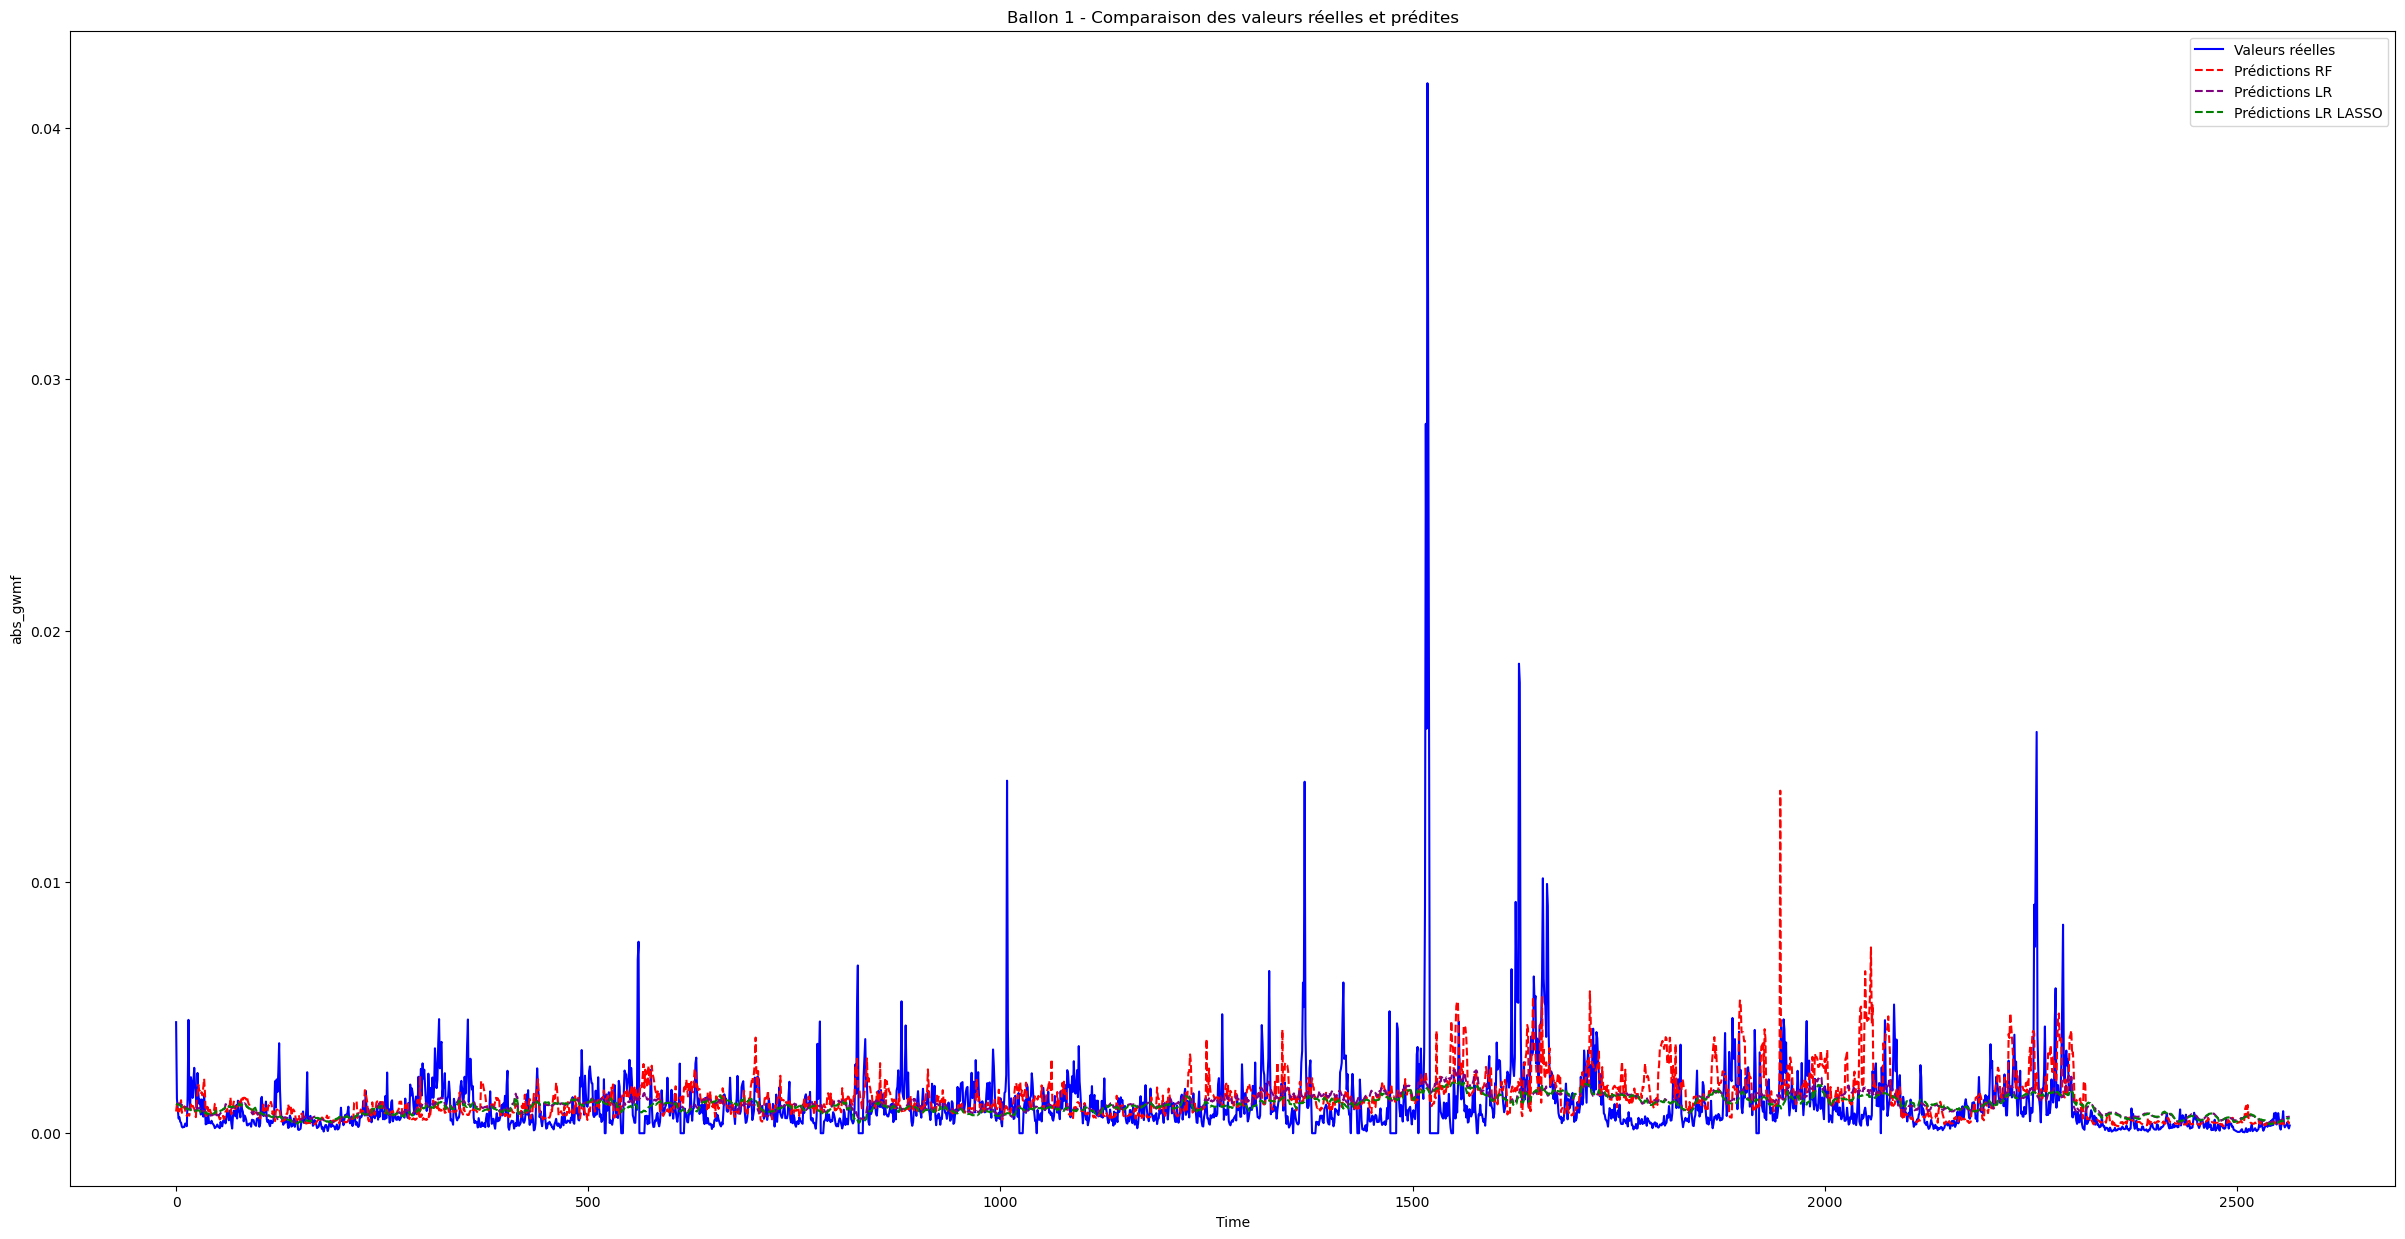

3.175290347686152e-06
2.828635881886281e-06
2.83428761427341e-06


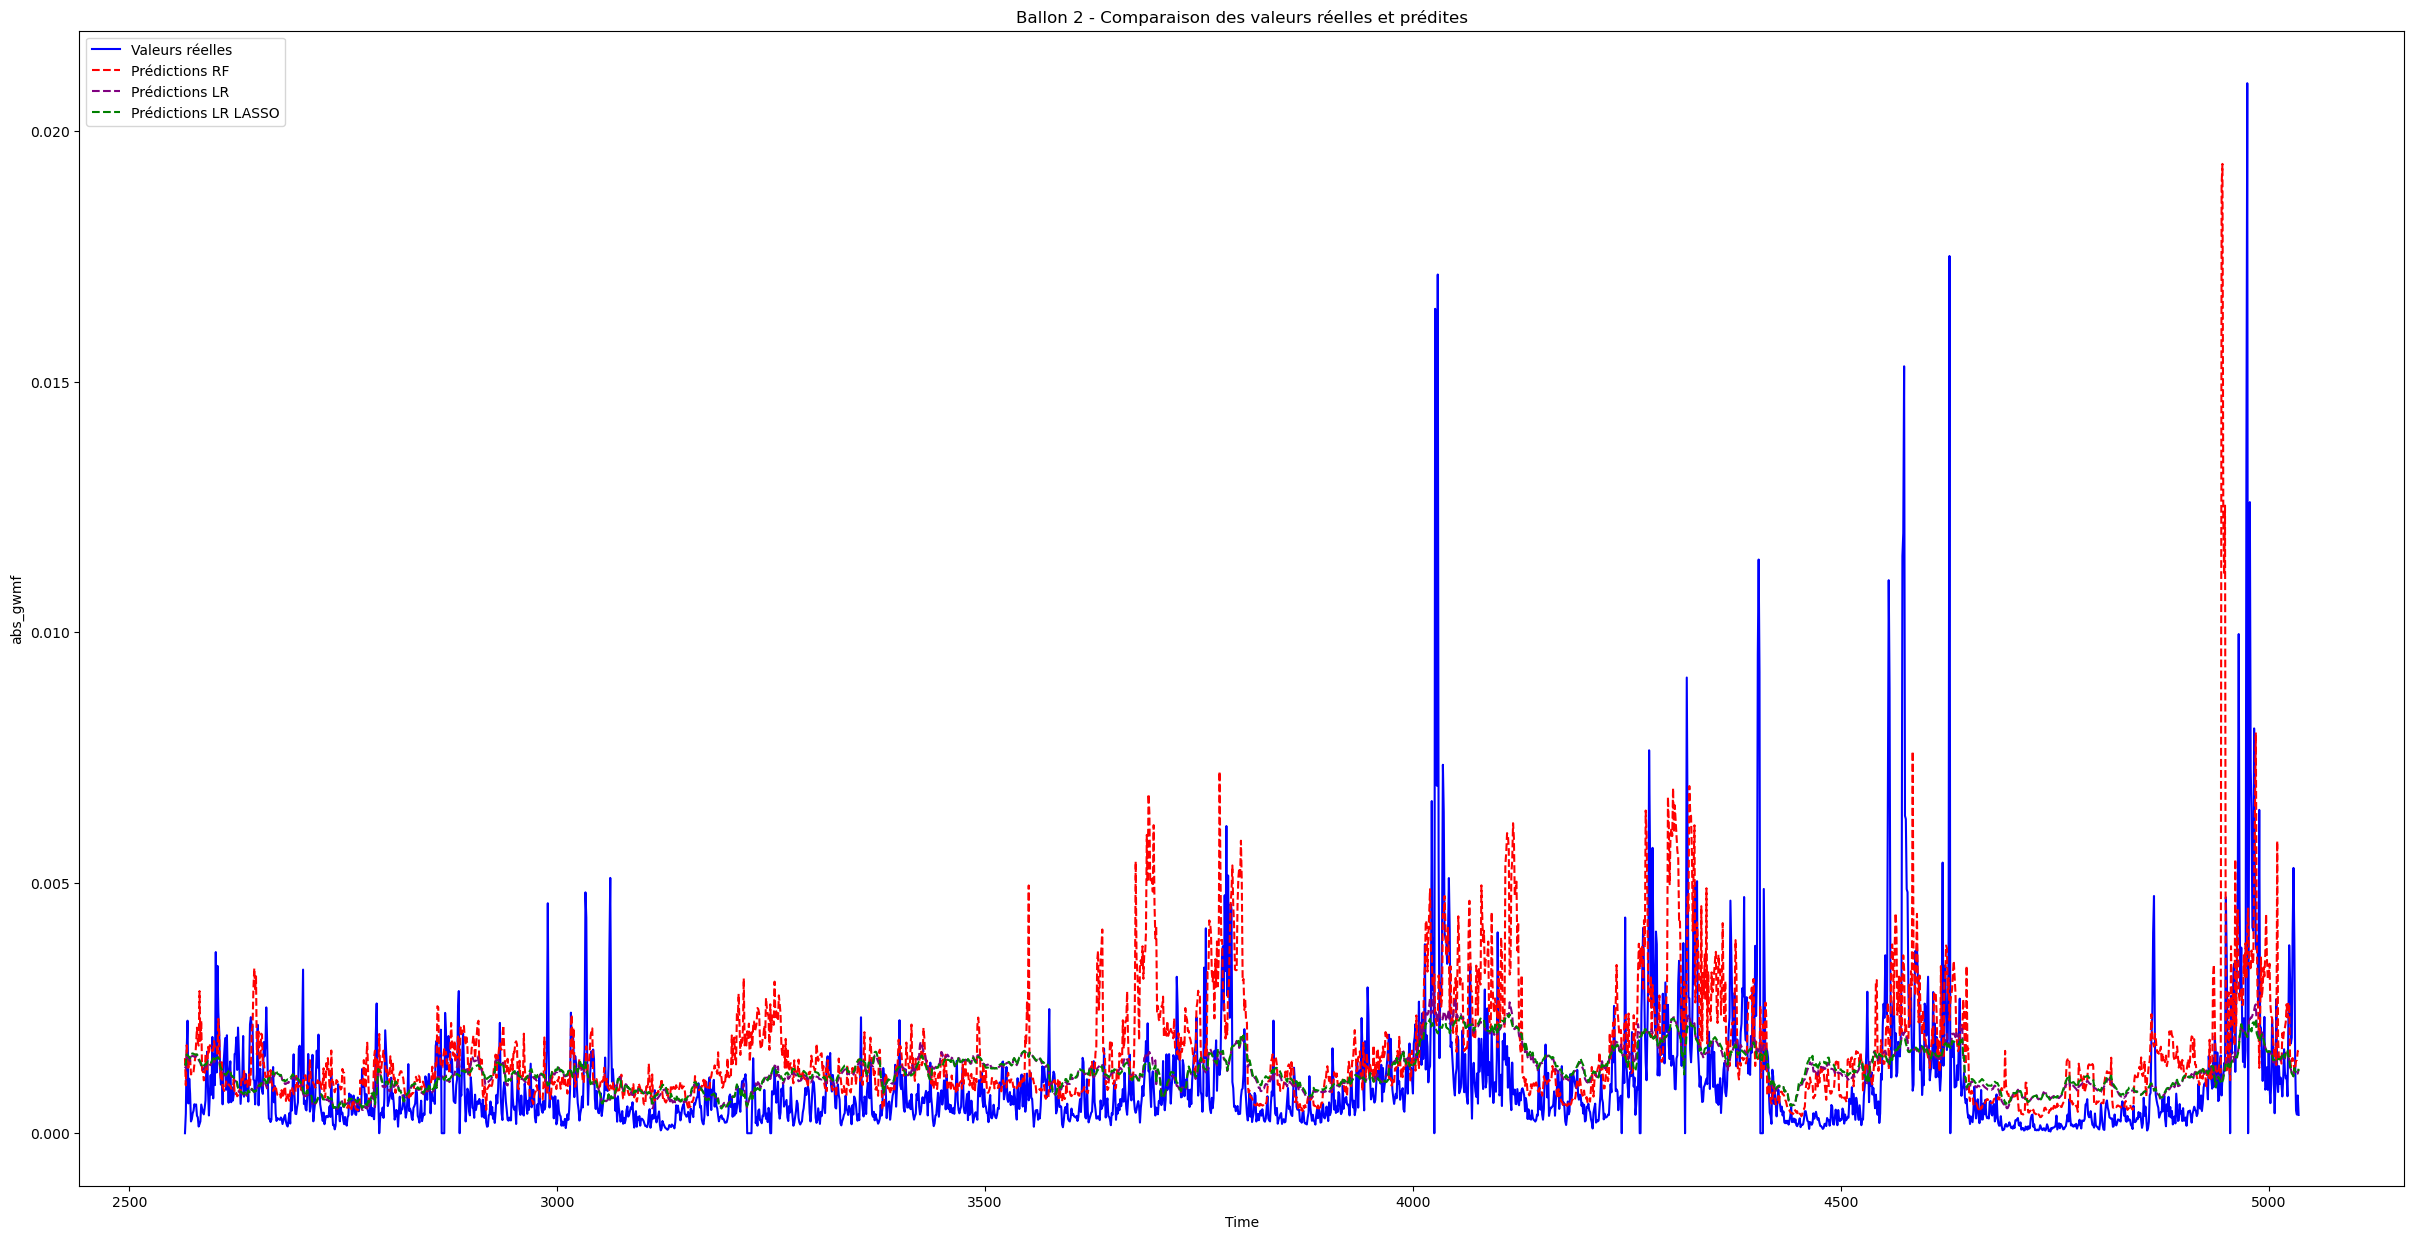

2.7654125503865916e-06
1.6621121392762249e-06
1.7145625688125426e-06


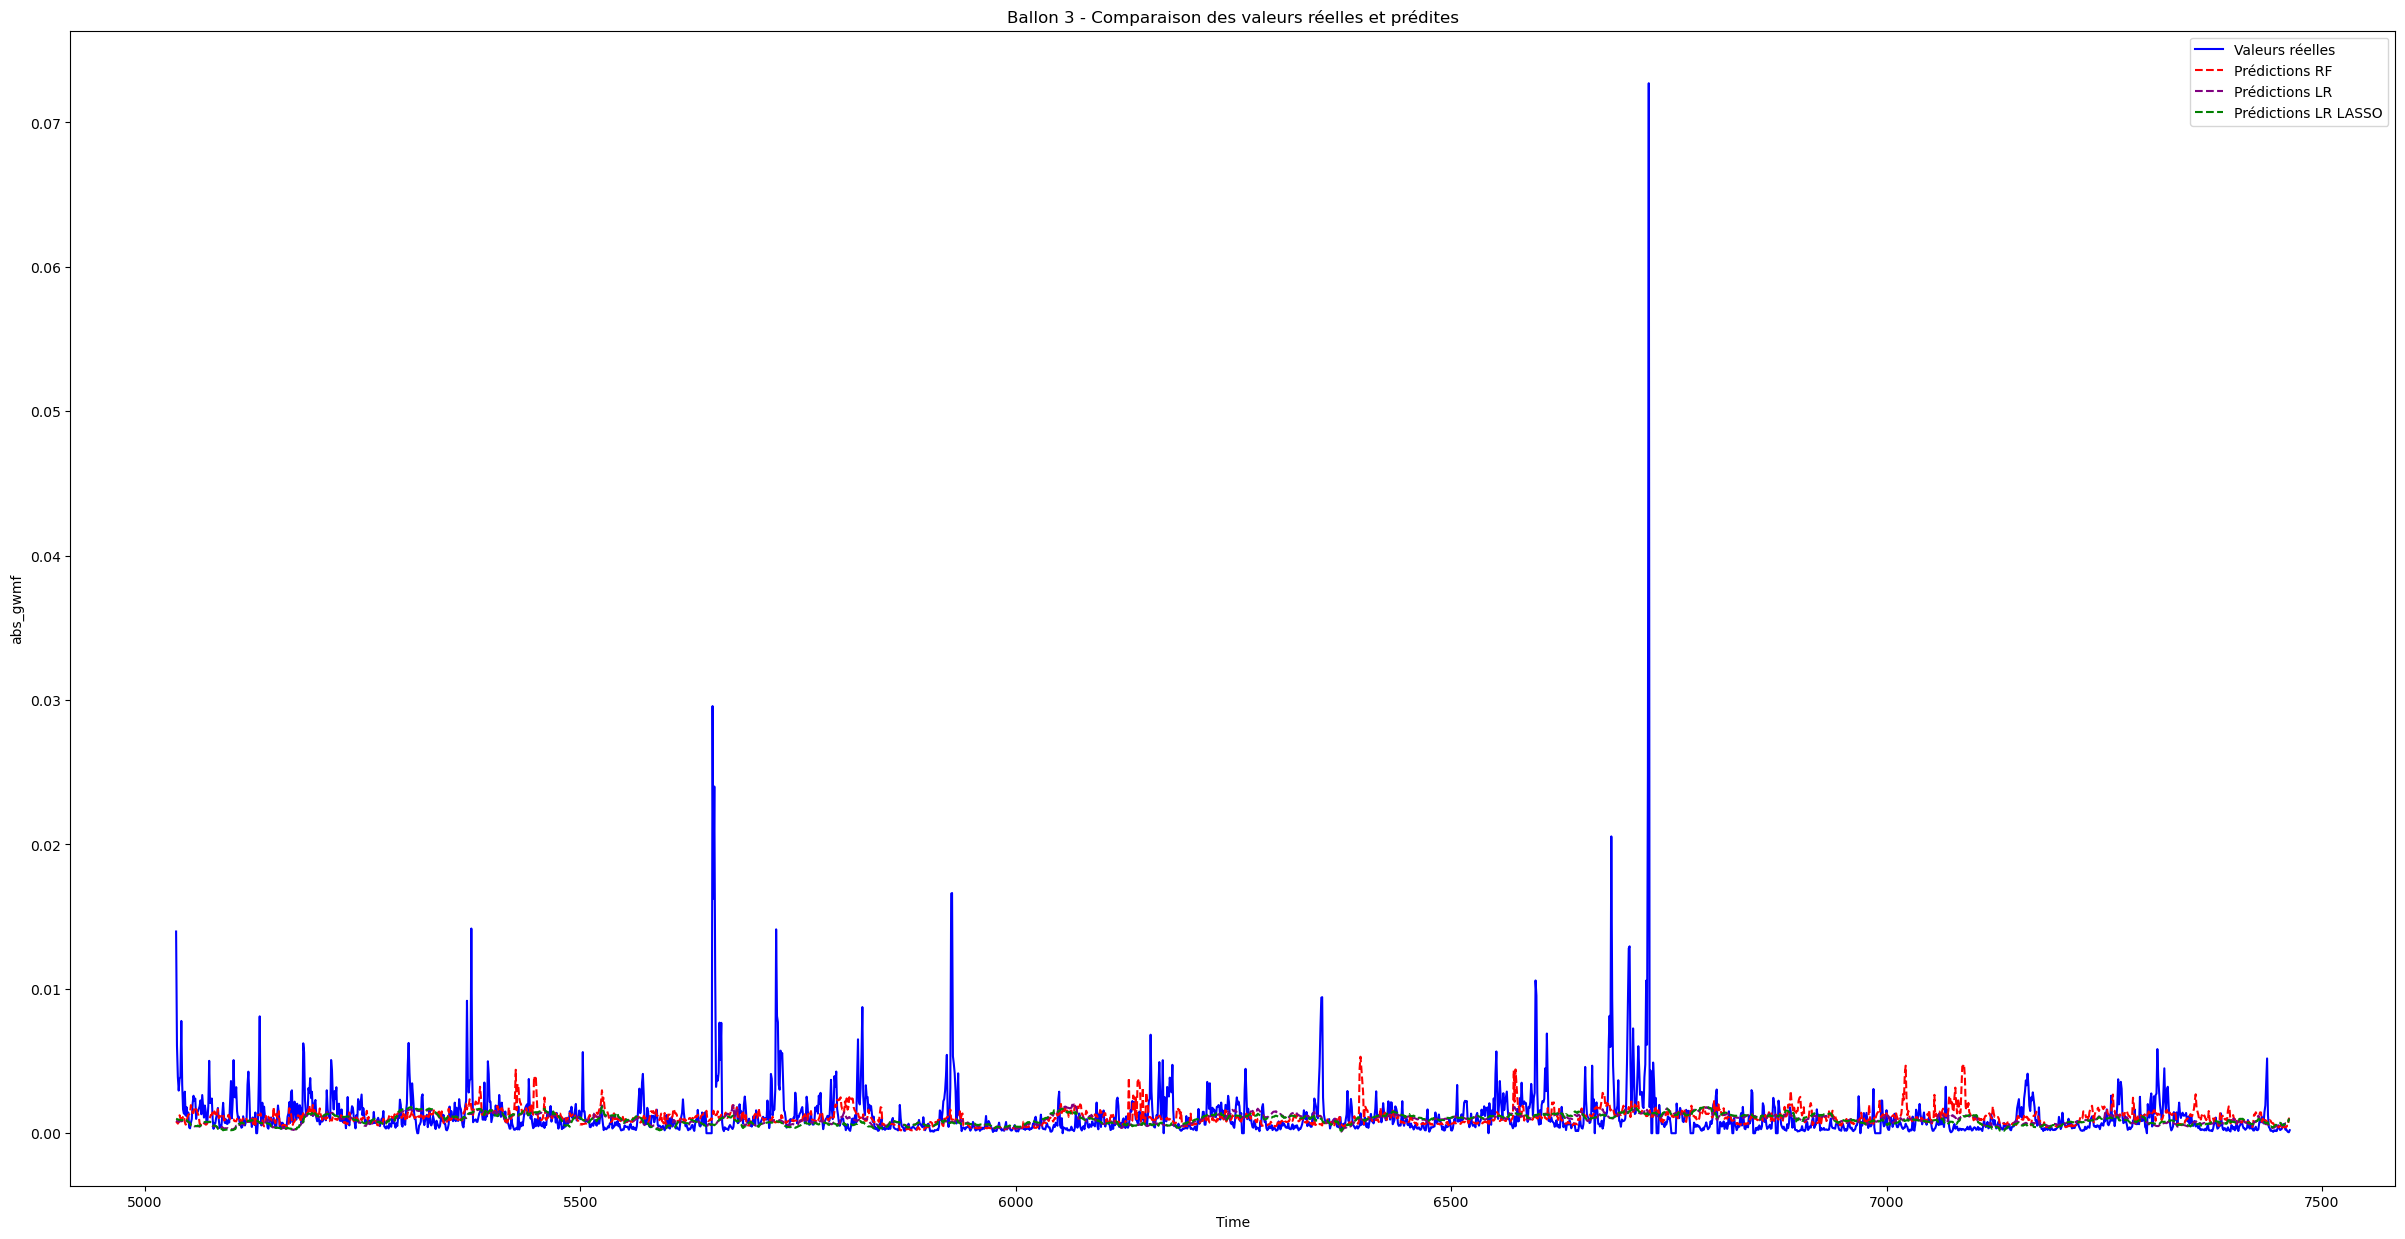

5.266878394520757e-06
5.201104720271169e-06
5.211898276549791e-06


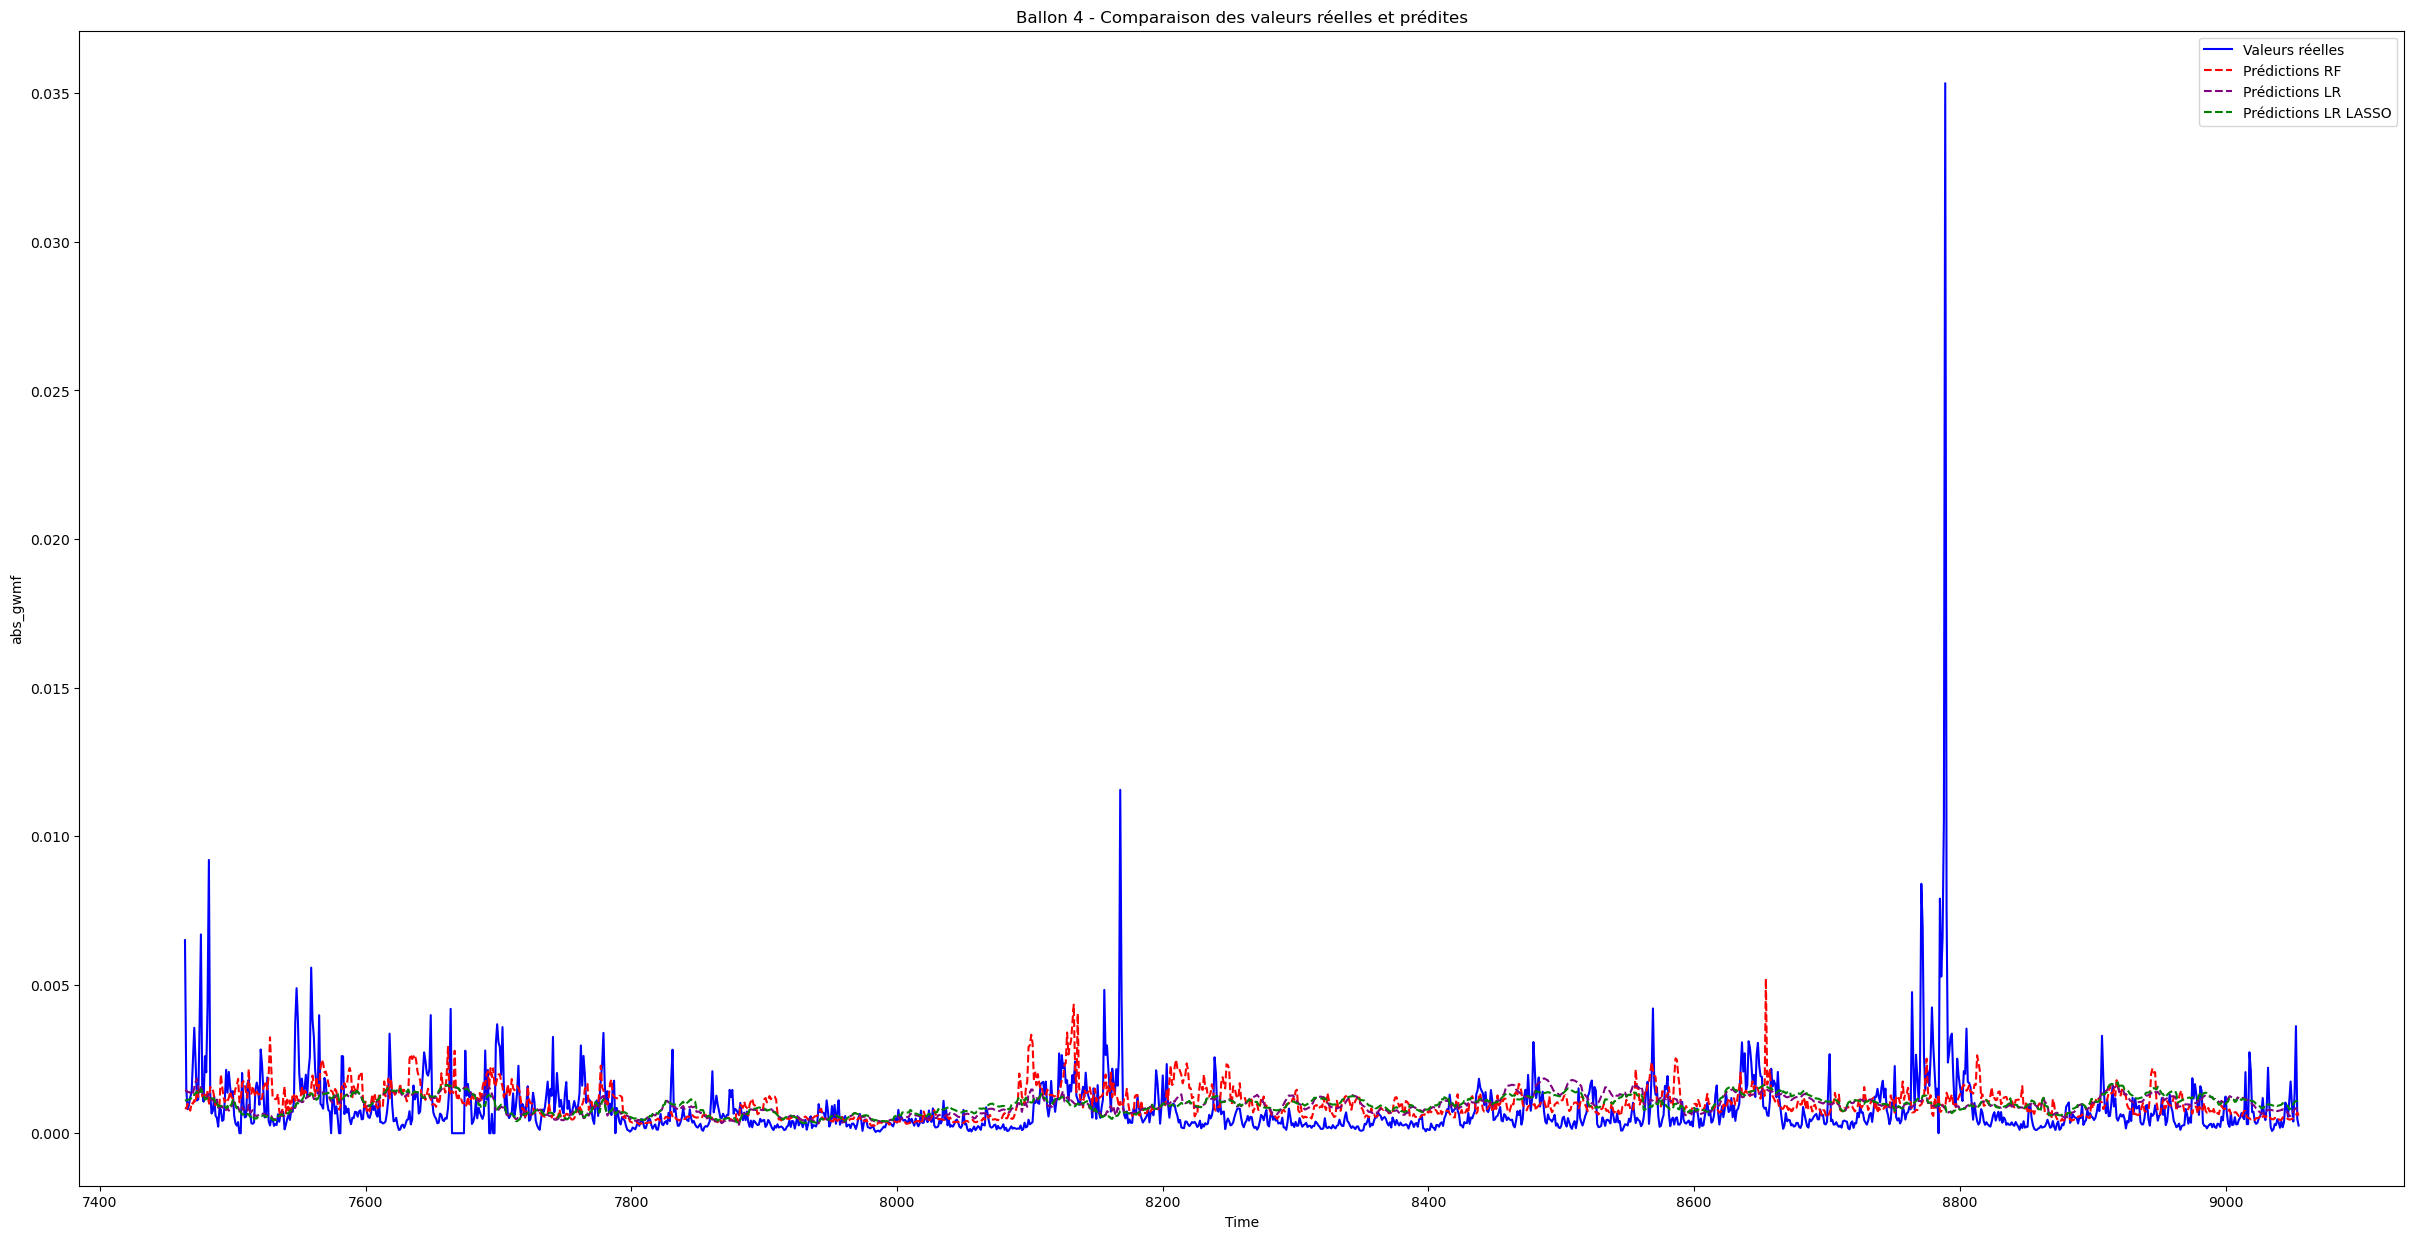

1.7387602818844146e-06
1.6869651175322343e-06
1.694144027861309e-06


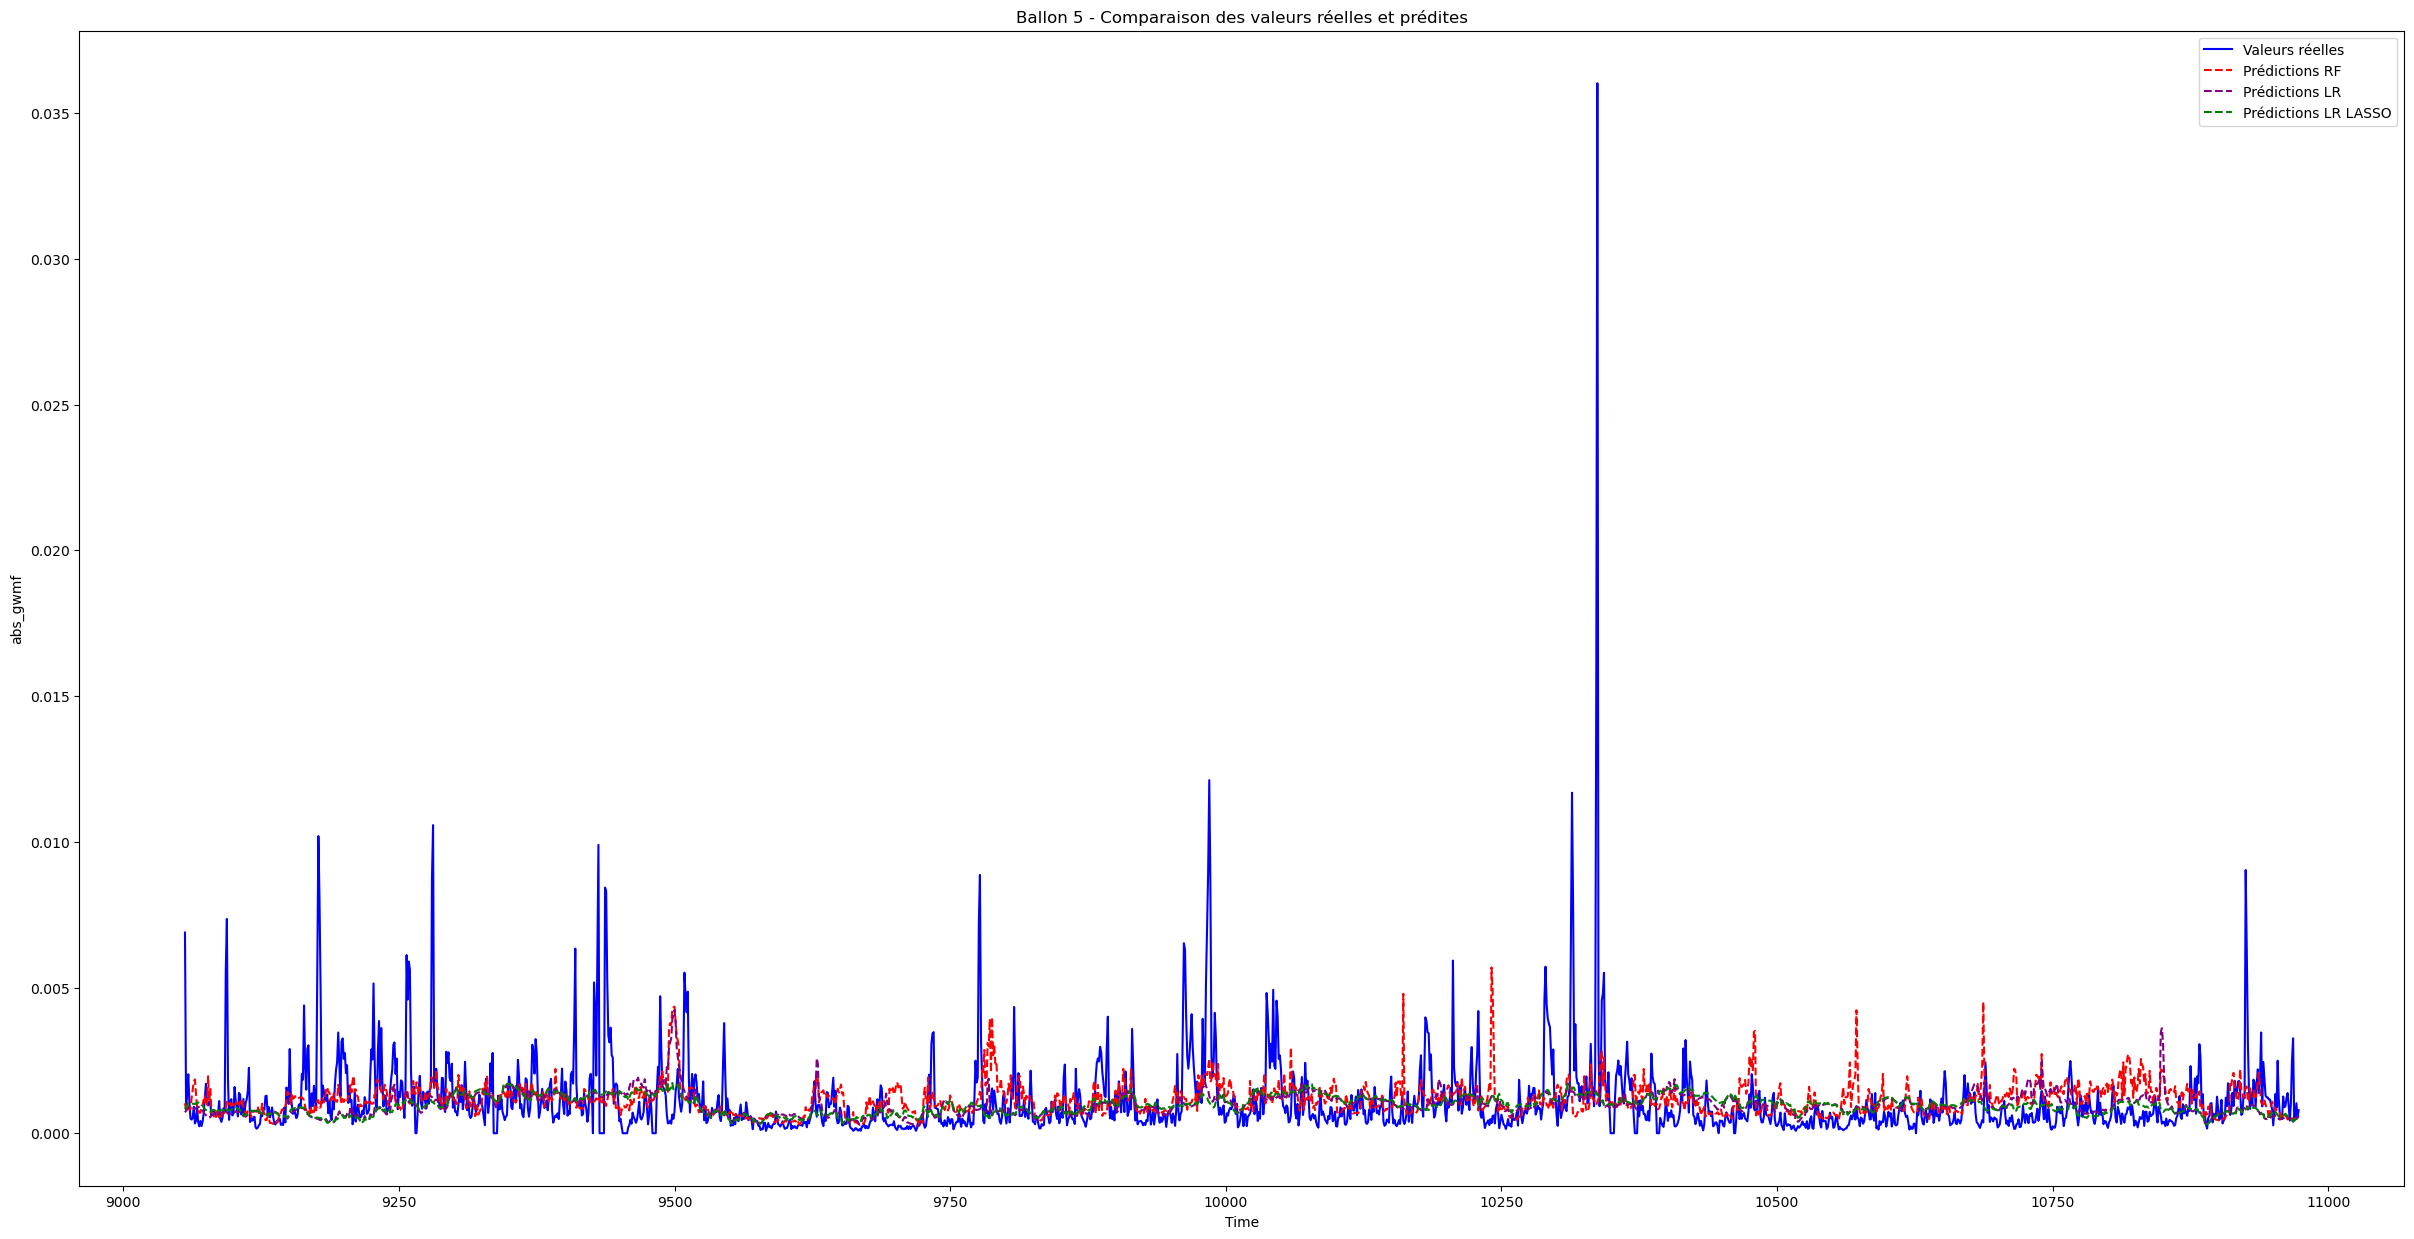

2.311025075115434e-06
2.241550217711188e-06
2.184014294103208e-06


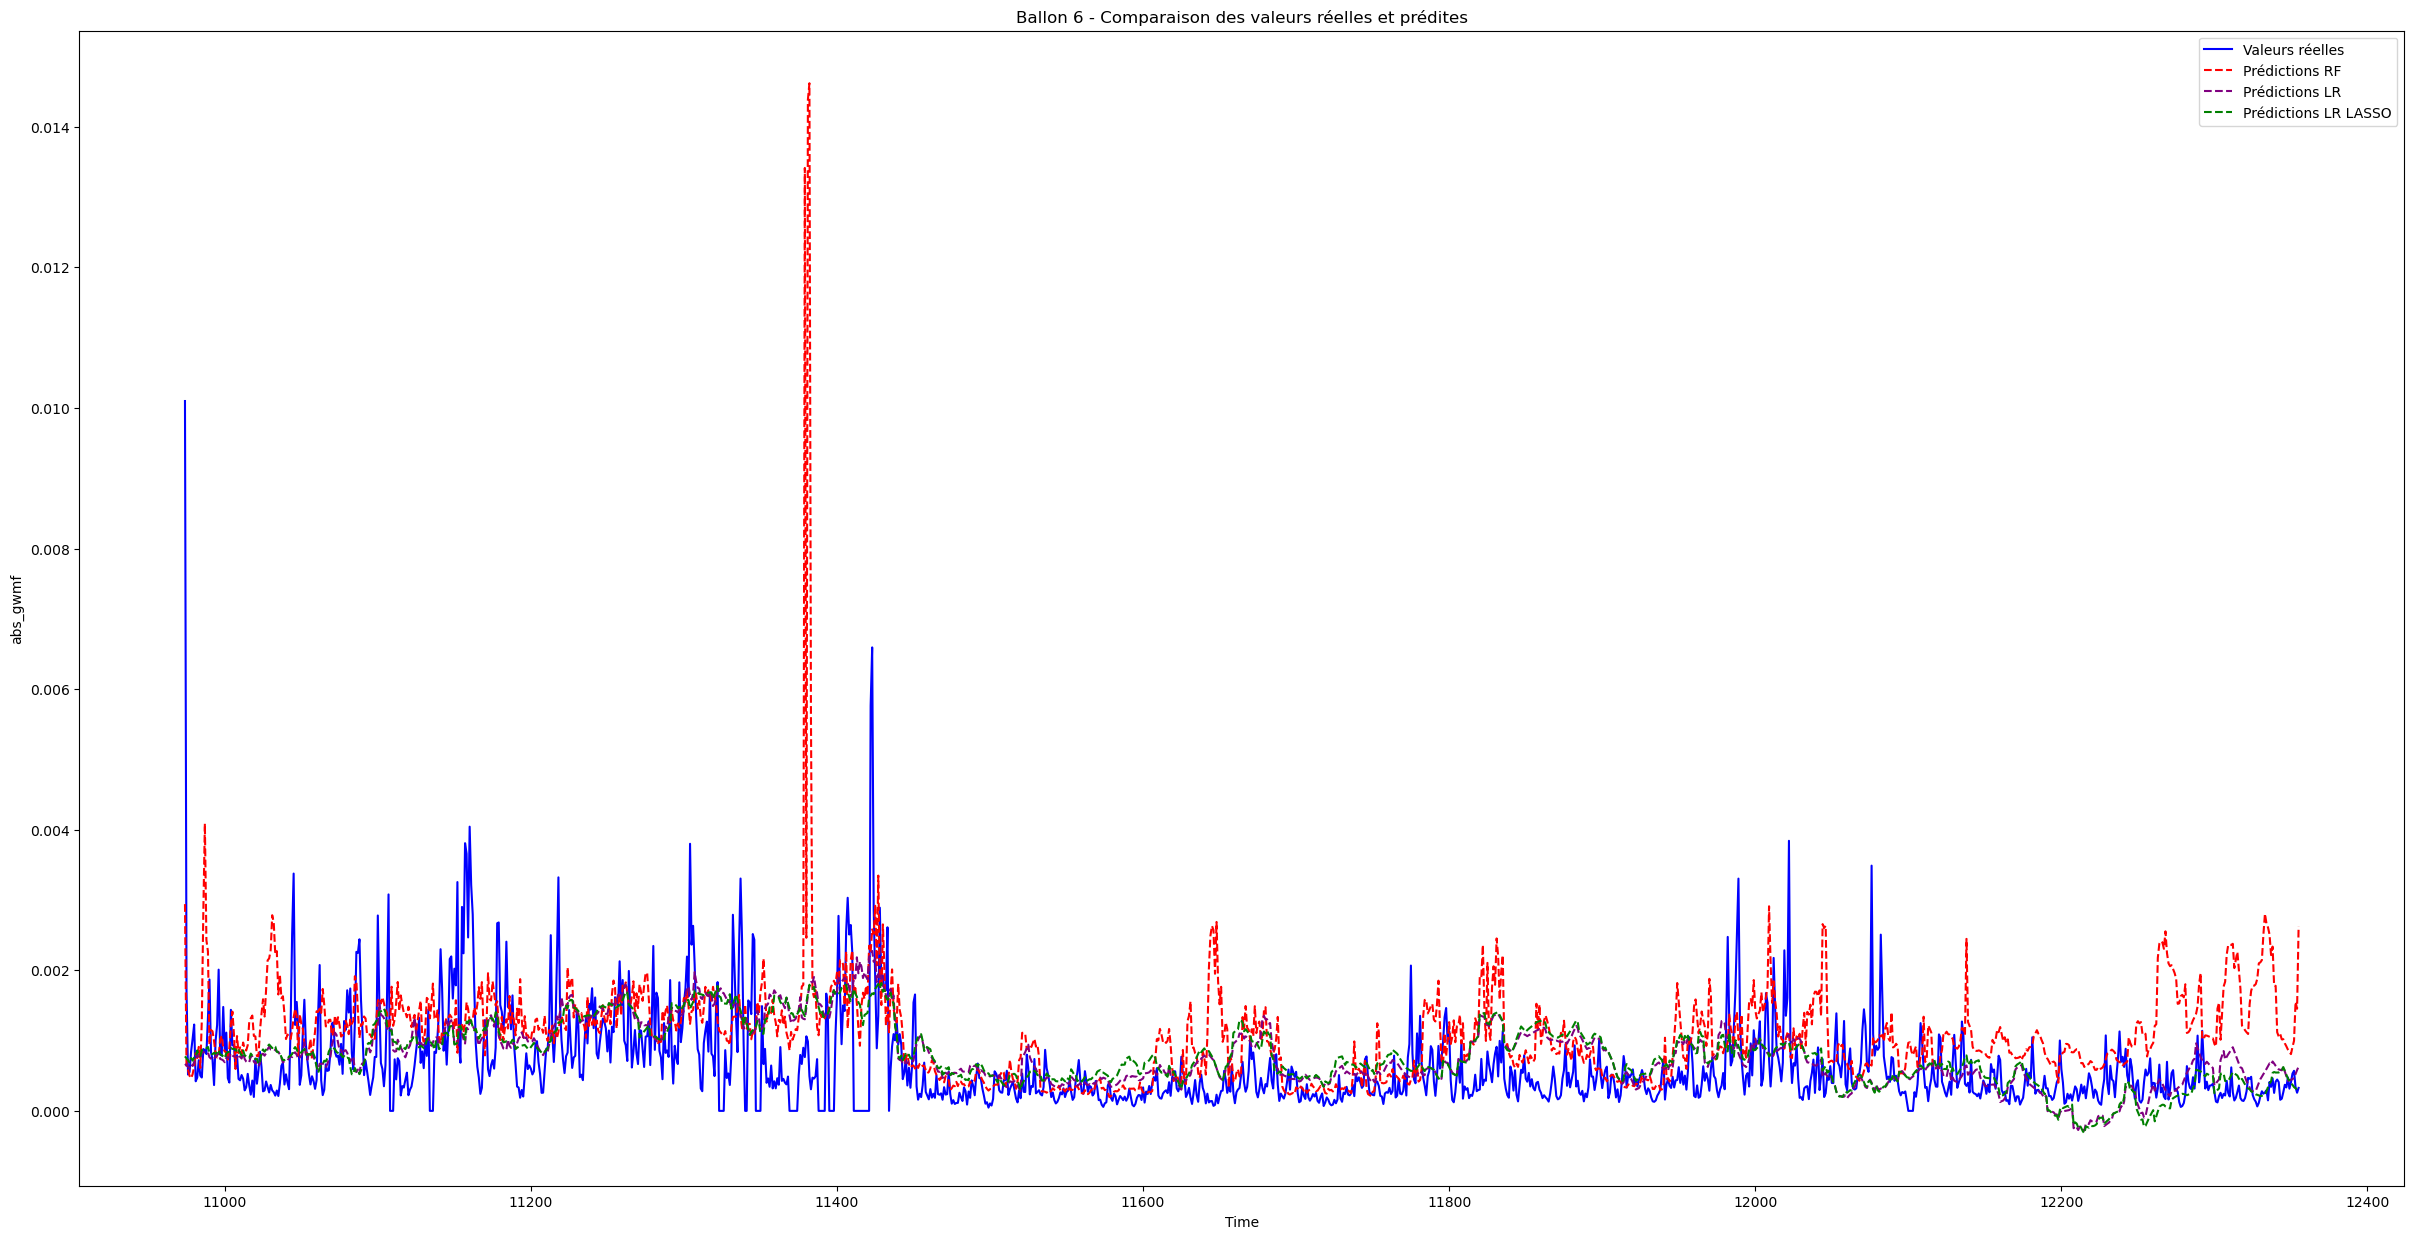

1.1371158036155083e-06
4.7107563440048464e-07
4.725246343232519e-07


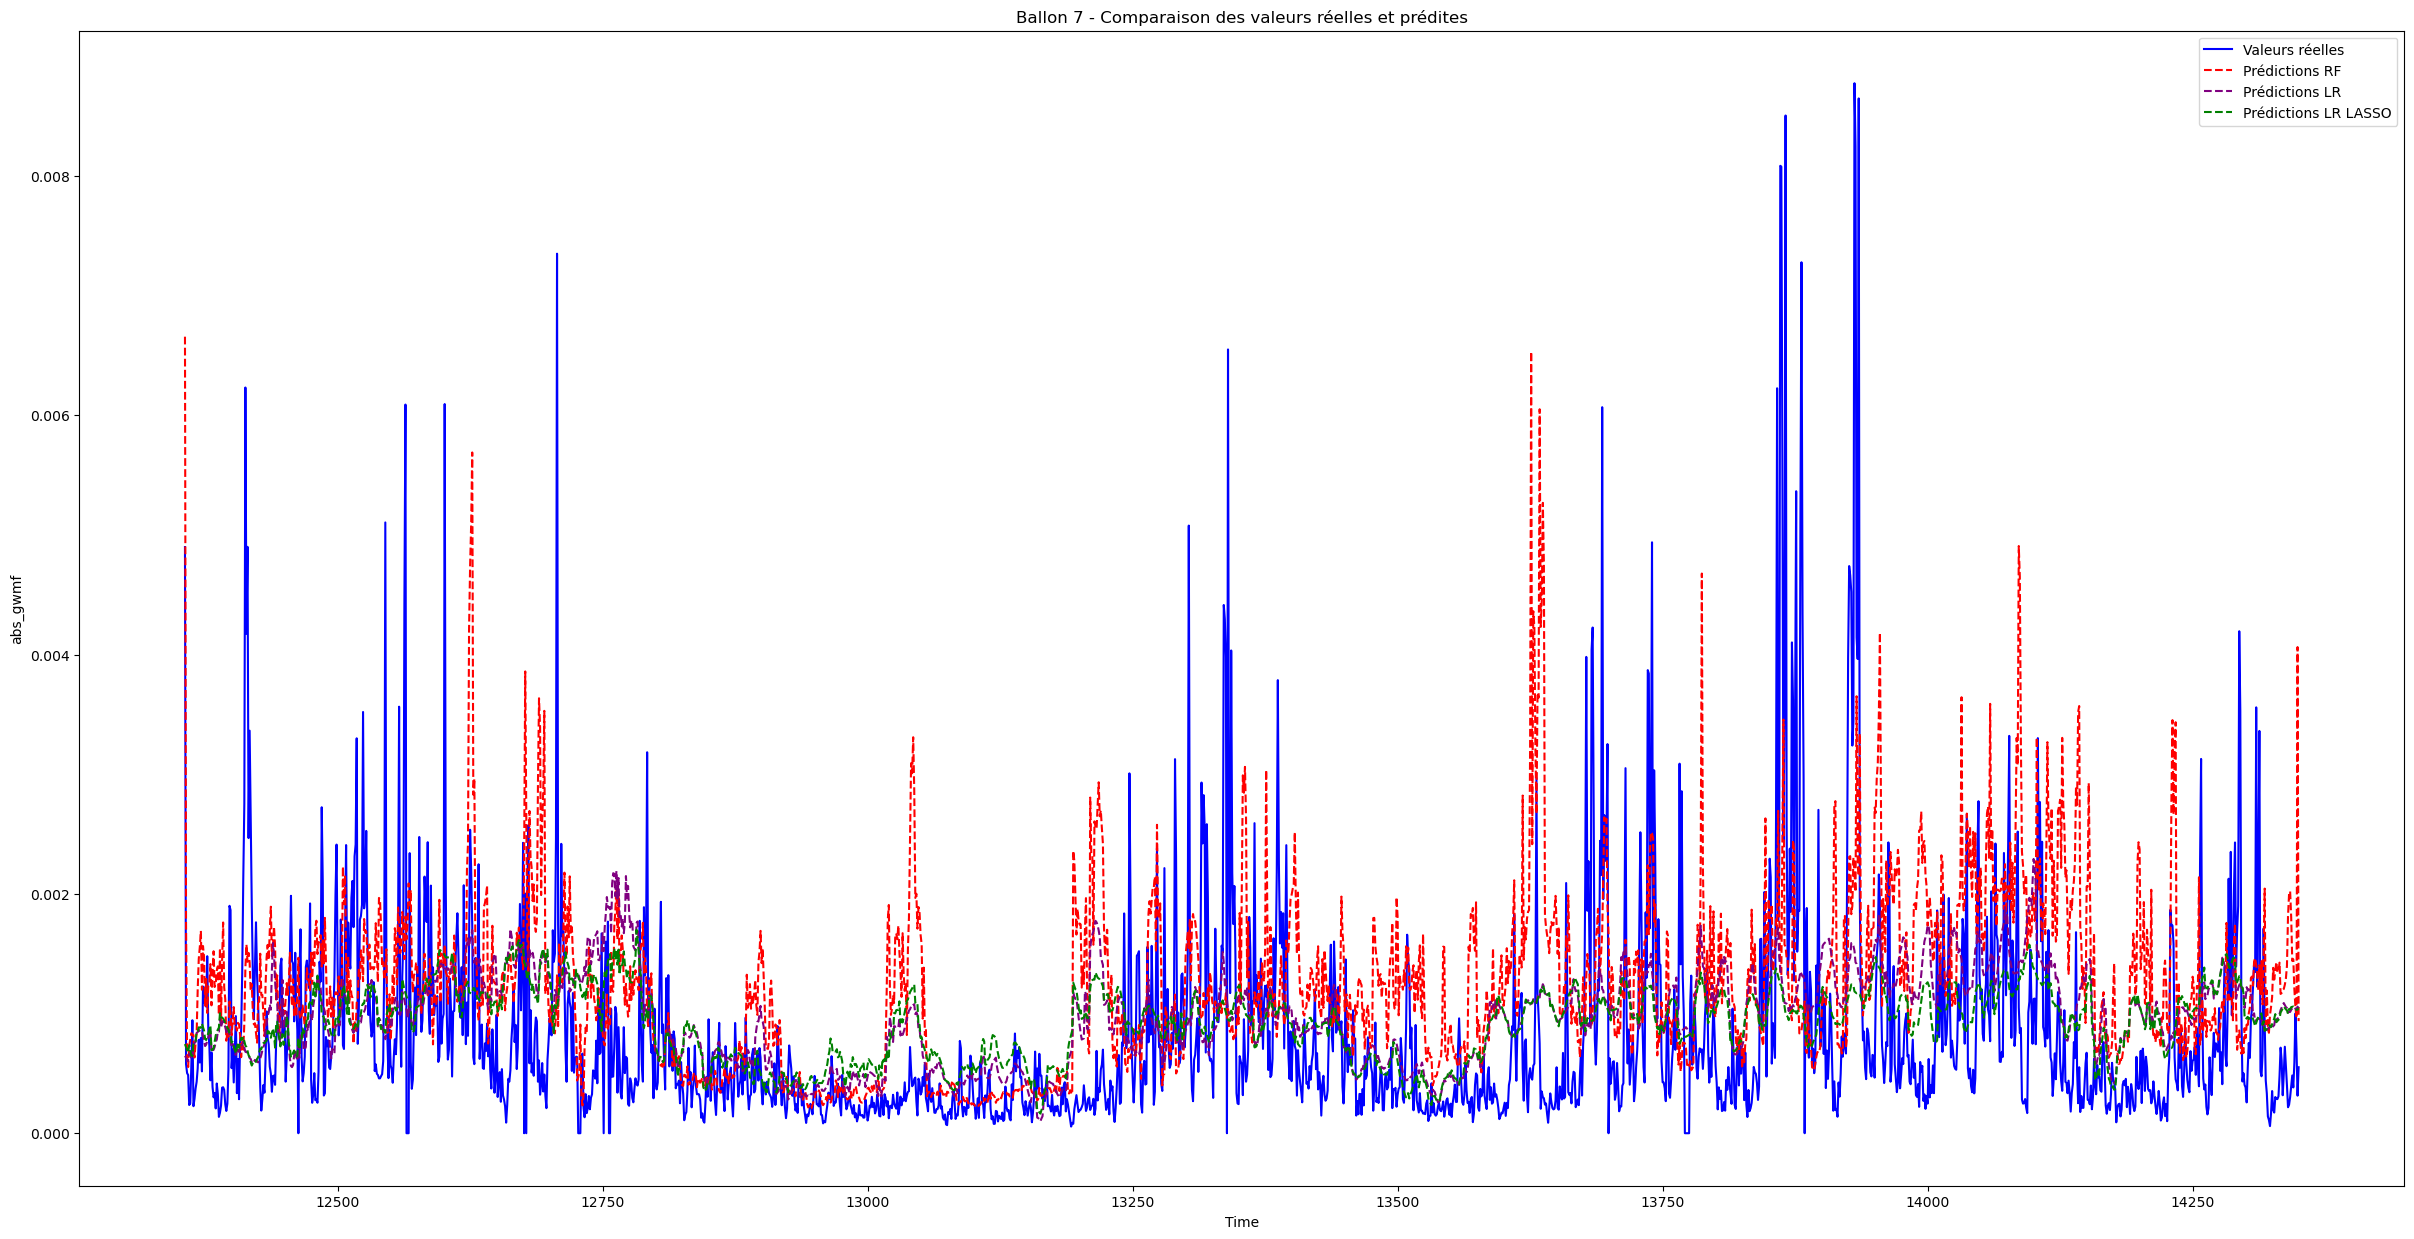

1.303239724416542e-06
8.756799645456741e-07
8.477412629743566e-07


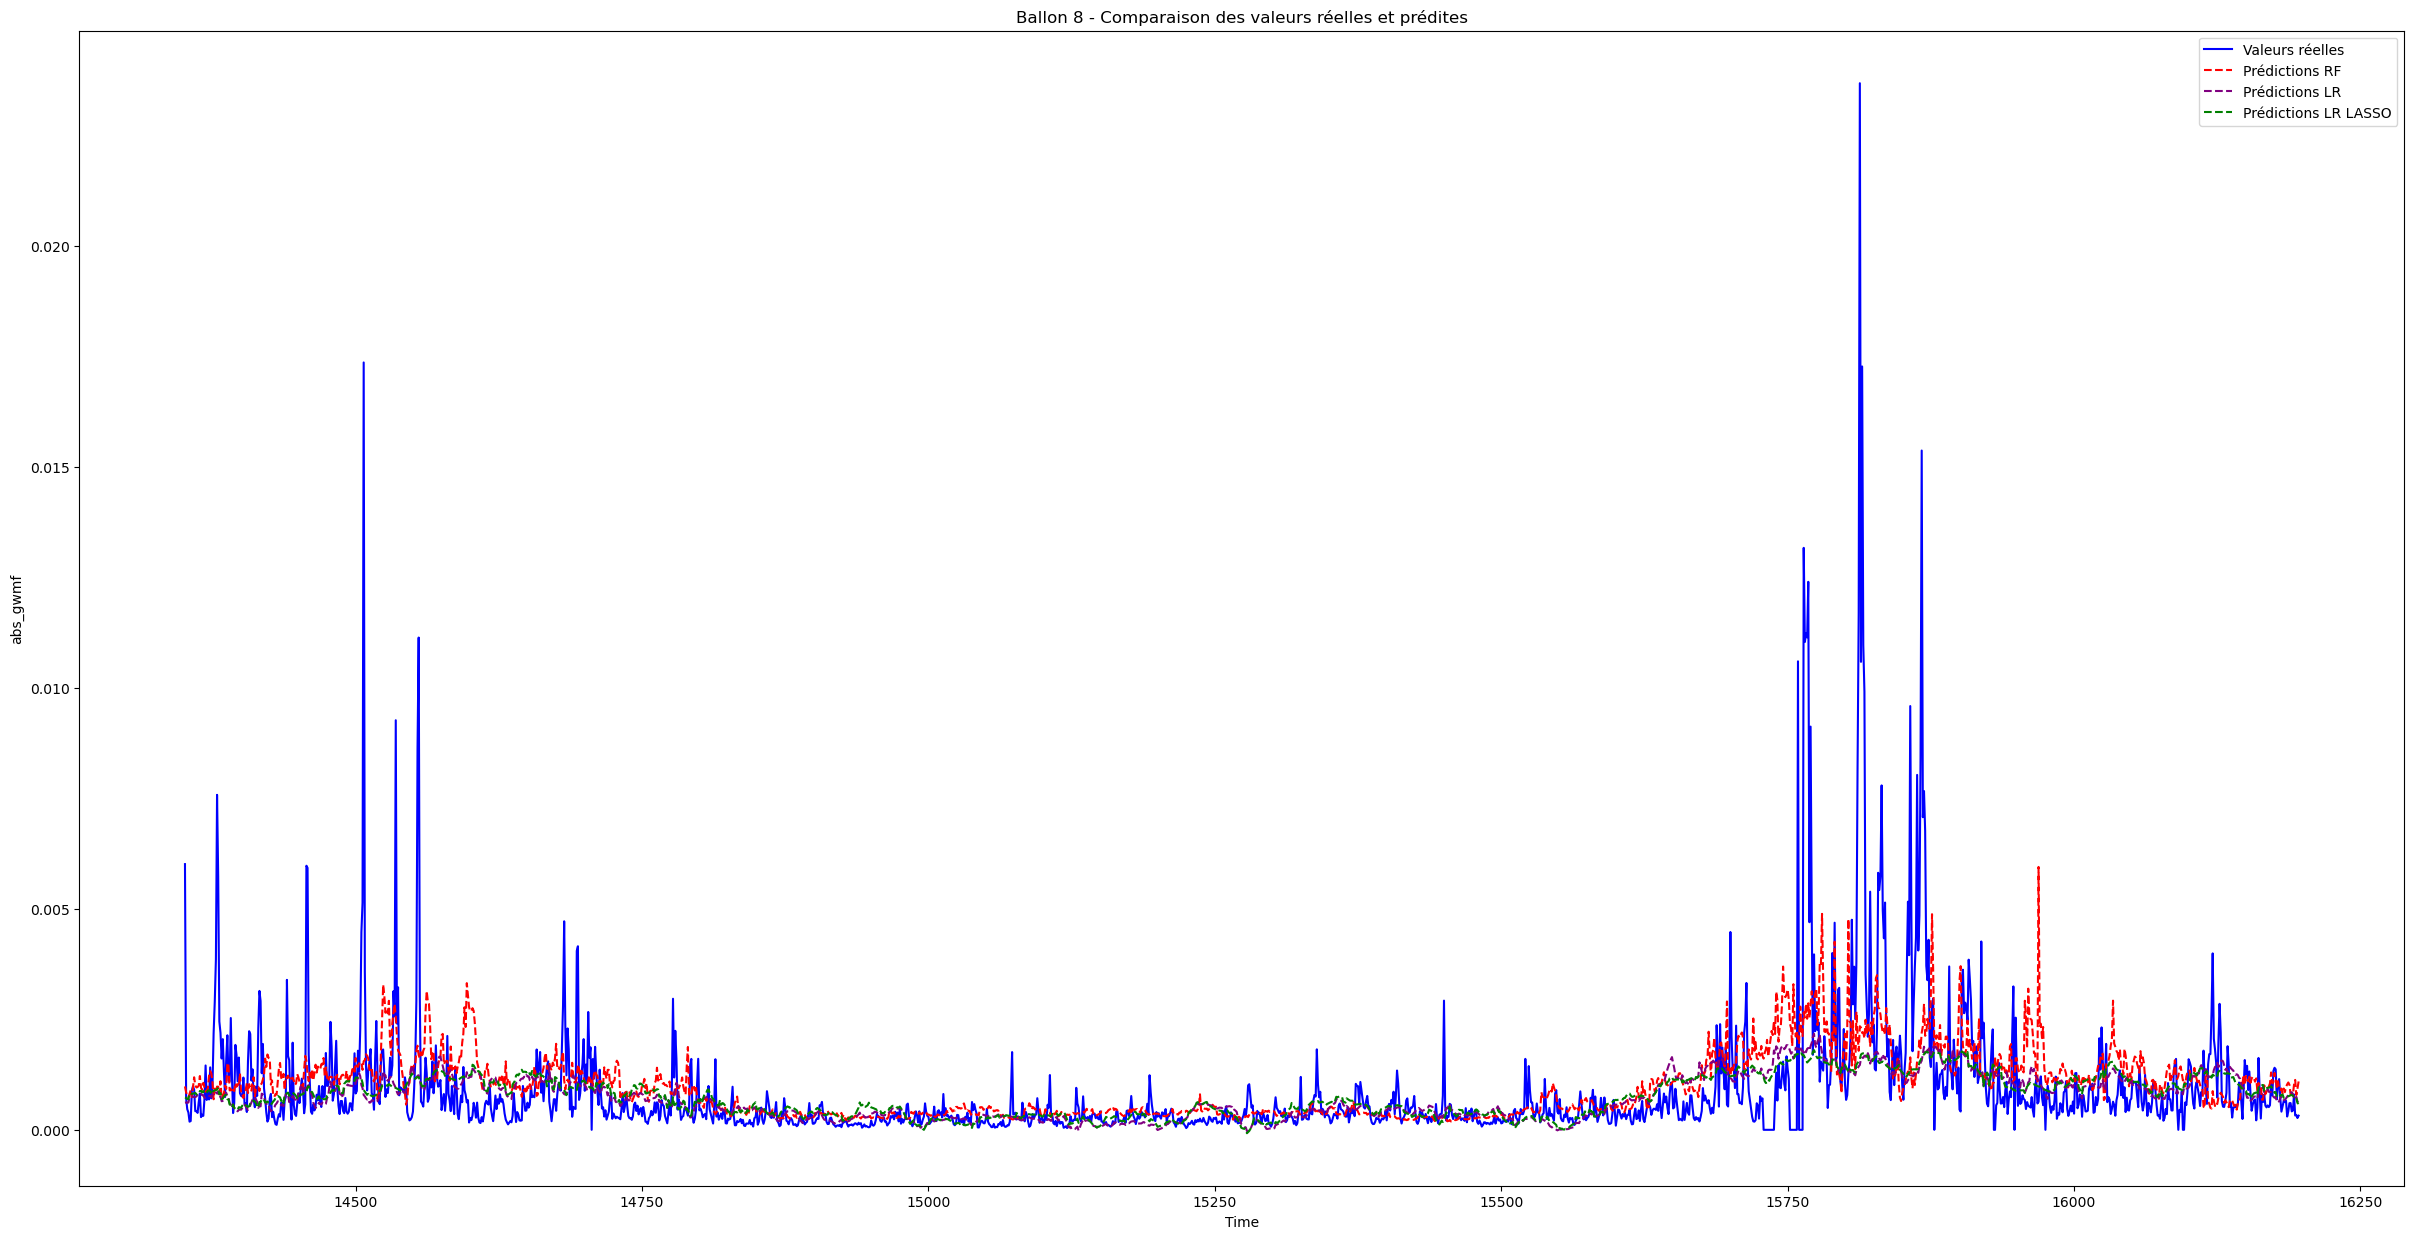

2.03106098157564e-06
2.050707577449878e-06
2.04616149099696e-06


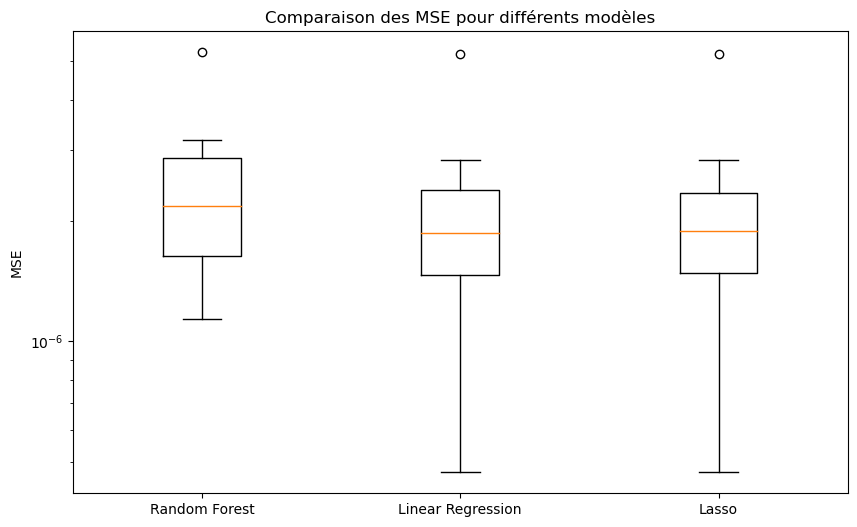

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.metrics import mean_squared_error

# Initialisation des modèles
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
lr_model = LinearRegression()
lasso_model = LassoCV(cv=5, random_state=42)  # Réglage du Lasso via CV interne

# Stockage des MSE de chaque modèle
mse_rf = []
mse_lr = []
mse_lasso = []

# Boucle pour entraîner et tester sur chaque ballon
for i in range(1, 9):
    # Préparer les données d'entraînement en excluant le ballon i
    train_data = pd.DataFrame()
    for j in range(1, 9):
        if j != i:
            train_data = pd.concat([train_data, dict_balloon[j]], ignore_index=True)

    # Les données de test sont celles du ballon i
    test_data = dict_balloon[i]

    # Séparer les caractéristiques et la cible
    X_train = train_data.drop('abs_gwmf', axis=1)
    y_train = train_data['abs_gwmf']
    X_test = test_data.drop('abs_gwmf', axis=1)
    y_test = test_data['abs_gwmf']

    # Entraînement des modèles
    rf_model.fit(X_train, y_train)
    lr_model.fit(X_train, y_train)
    lasso_model.fit(X_train, y_train)  # LassoCV fait de la validation croisée interne

    # Prédiction sur le ballon de test
    predictions_rf = rf_model.predict(X_test)
    predictions_lr = lr_model.predict(X_test)
    predictions_lasso = lasso_model.predict(X_test)

    # Prediction vs valeurs réels graphs : 
    plt.figure(figsize=(30,15))  # Taille du graphique
    plt.plot(test_data.index, y_test, label='Valeurs réelles', color='blue')
    plt.plot(test_data.index,  predictions_rf, label='Prédictions RF', color='red', linestyle='--')
    plt.plot(test_data.index, predictions_lr, label='Prédictions LR', color='purple', linestyle='--')
    plt.plot(test_data.index, predictions_lasso, label='Prédictions LR LASSO', color='green', linestyle='--')
    plt.title(f'Ballon {i} - Comparaison des valeurs réelles et prédites')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('abs_gwmf')
    plt.show() 

    # Calcul des MSE pour chaque modèle
    mse_rf.append(mean_squared_error(y_test, predictions_rf))
    print(mse_rf[i-1])
    mse_lr.append(mean_squared_error(y_test, predictions_lr))
    print(mse_lr[i-1])
    mse_lasso.append(mean_squared_error(y_test, predictions_lasso))
    print(mse_lasso[i-1])

# Création du boxplot pour comparer les MSE
plt.figure(figsize=(10, 6))
plt.boxplot([mse_rf, mse_lr, mse_lasso], labels=['Random Forest', 'Linear Regression', 'Lasso'])
plt.title('Comparaison des MSE pour différents modèles')
plt.ylabel('MSE')
plt.yscale('log')  # Utilisation de l'échelle logarithmique
plt.show()


# Nearest Neighbor

An alternative to tree-based methods may be the k-Nearest Neighbor algorithm. It takes the closest training observations based on Euclidean distance and predicts the output as the average of the k nearest neighbors outputs. Note that k is in this case a crucial parameter to tune. This models retained as an alternative and cheap non-parametric model, and for its great simplicity.

# Linear regression 

### Approche paramétrique : 

/var/folders/85/w86zwk1d6rsg9ct11l1475ww0000gn/T/ipykernel_62140/46980839.py:16: RuntimeWarning: invalid value encountered in log
  df_test['Predicted'] = np.log(y_pred)
/Users/aminerazig/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


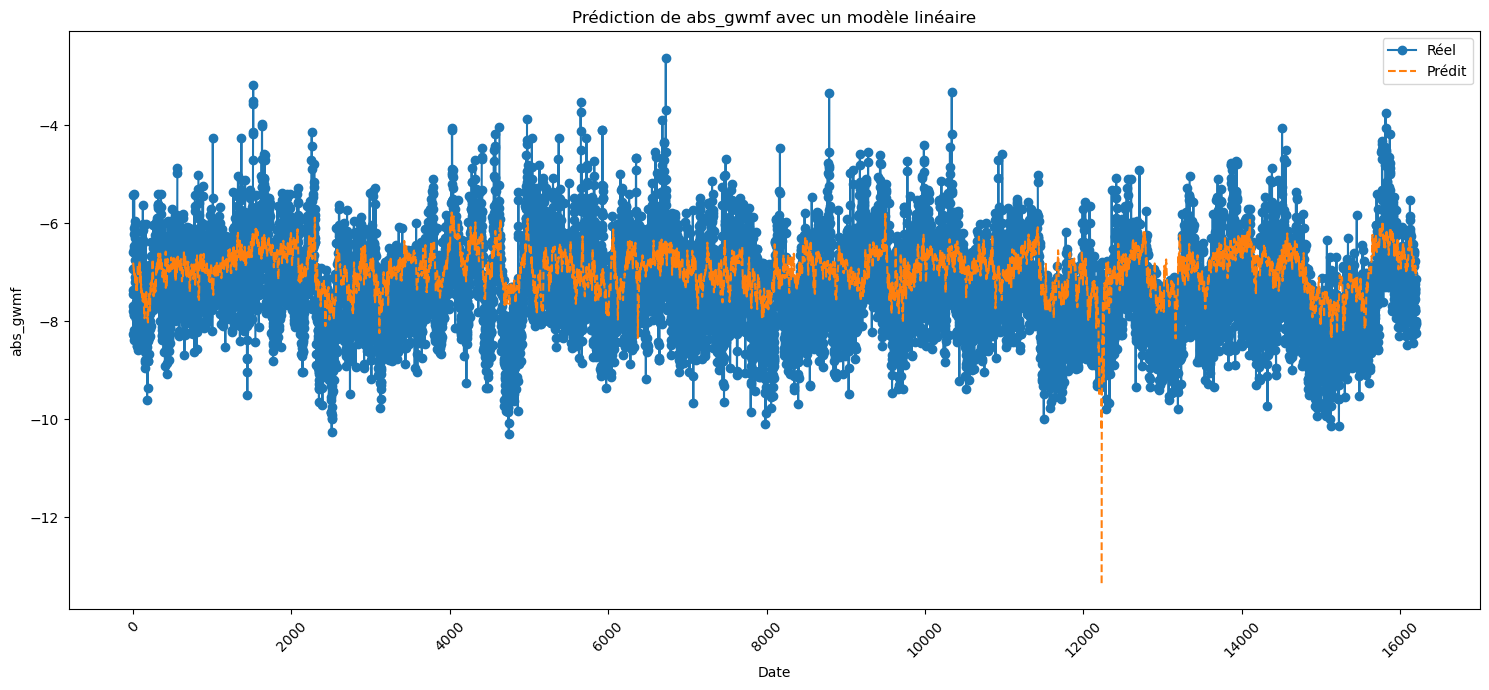

In [34]:
from sklearn.linear_model import LinearRegression

X = df[['tp', 'lnsp', 'temp19', 'temp9', 'temp2', 'temp0', 'u19', 'u9', 'u2', 'u0', 'v19', 'v9', 'v2', 'v0', 'sza', 'tp_mean', 'tp_sd']]
y = df['abs_gwmf']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

# Prédiction
y_pred = model.predict(X)

# Ajout des prédictions dans le DataFrame de test pour le tracé
df_test = df.copy()
df_test['Predicted'] = np.log(y_pred)

plt.figure(figsize=(15, 7))
plt.plot(np.log(df['abs_gwmf']), label='Réel', marker='o')
plt.plot(df_test['Predicted'], label='Prédit', linestyle='--')
plt.xlabel('Date')
plt.ylabel('abs_gwmf')
plt.title('Prédiction de abs_gwmf avec un modèle linéaire')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


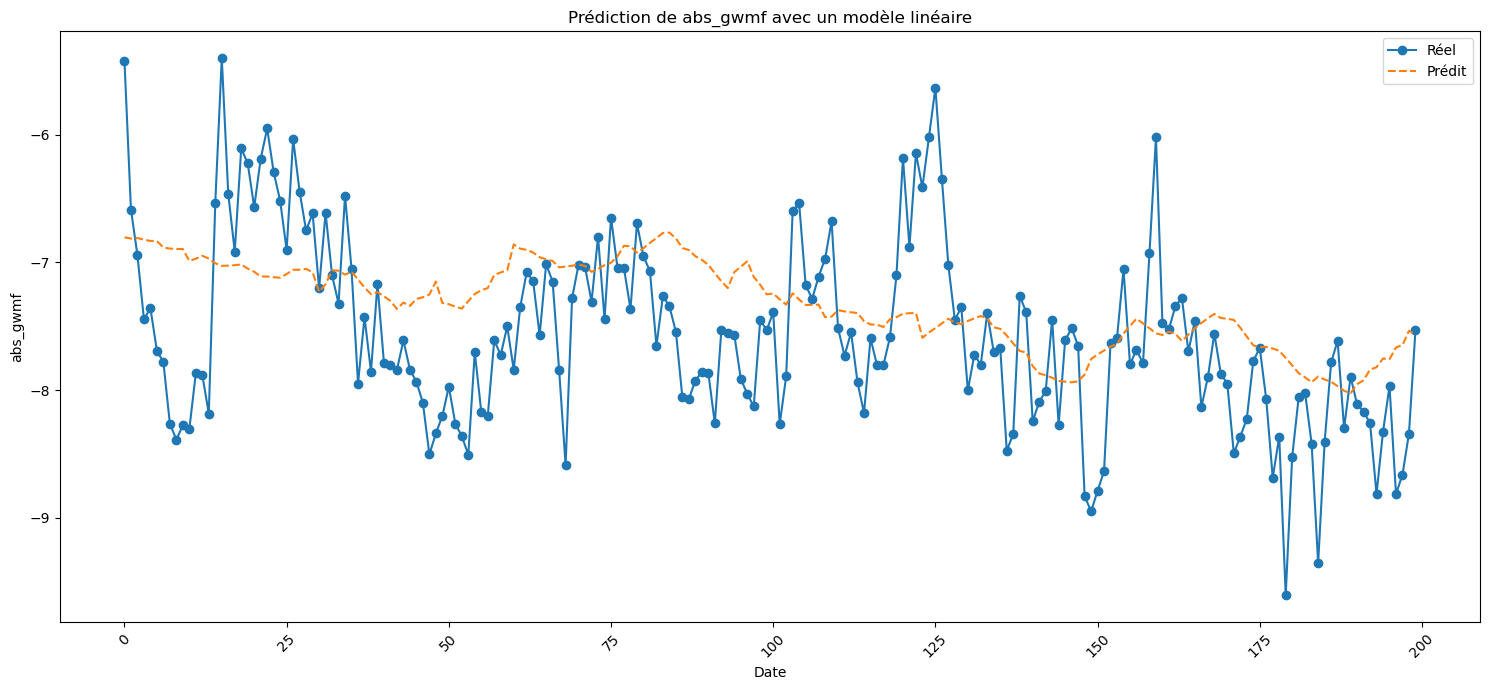

In [35]:
plt.figure(figsize=(15, 7))
plt.plot(np.log(df['abs_gwmf'][:200]), label='Réel', marker='o')
plt.plot(df_test['Predicted'][:200], label='Prédit', linestyle='--')
plt.xlabel('Date')
plt.ylabel('abs_gwmf')
plt.title('Prédiction de abs_gwmf avec un modèle linéaire')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

    -> UNDERFITTING 

In [ ]:
"""Initialisation des modèles à comparer"""

models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': LassoCV(cv=KFold(n_splits=10, shuffle=True, random_state=42)),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'KNN' : KNeighborsRegressor()
}


# FIN ANALYSE AMINE

___________________________________
___________________________________

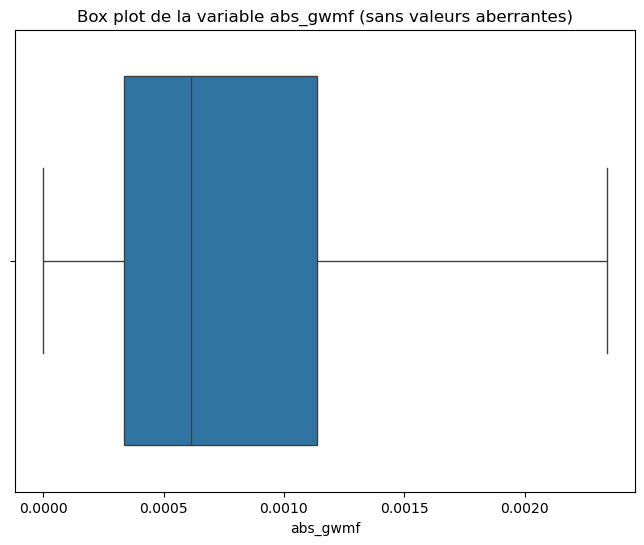

In [182]:

# Tracer un box plot de la variable abs_gwmf sans les valeurs aberrantes
plt.figure(figsize=(8, 6))
sns.boxplot(x='abs_gwmf', data=df, showfliers=False)
plt.title('Box plot de la variable abs_gwmf (sans valeurs aberrantes)')
plt.xlabel('abs_gwmf')
plt.show()


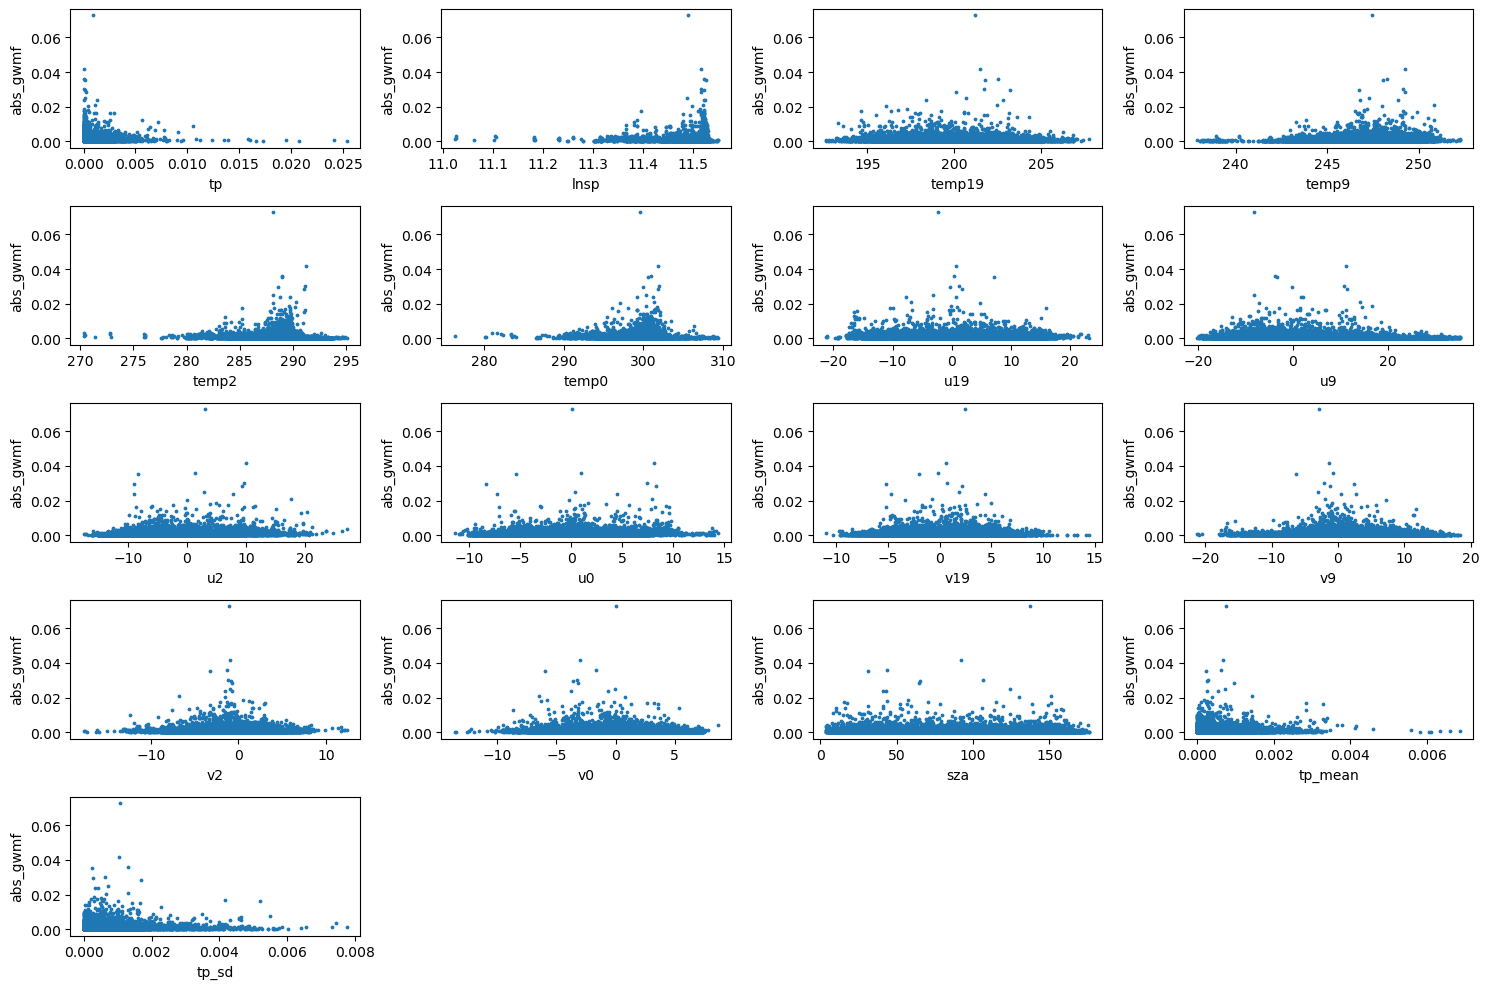

In [183]:
"""Observation des distributions"""

# Définir le nombre de colonnes pour organiser les graphiques
num_cols = 4
num_rows = (len(df.columns) - 1) // num_cols + 1

# Créer une nouvelle figure avec une taille spécifiée
plt.figure(figsize=(15, 10))

# Tracer les graphiques de dispersion pour chaque variable
for i, col in enumerate(df.columns.drop('abs_gwmf')):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.scatter(df[col], df['abs_gwmf'], s=3)  # Ajuster la taille des points ici    
    plt.xlabel(col)
    plt.ylabel('abs_gwmf')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.savefig('distribution_graphs.jpeg')  # Vous pouvez changer le format ici si besoin
plt.show()

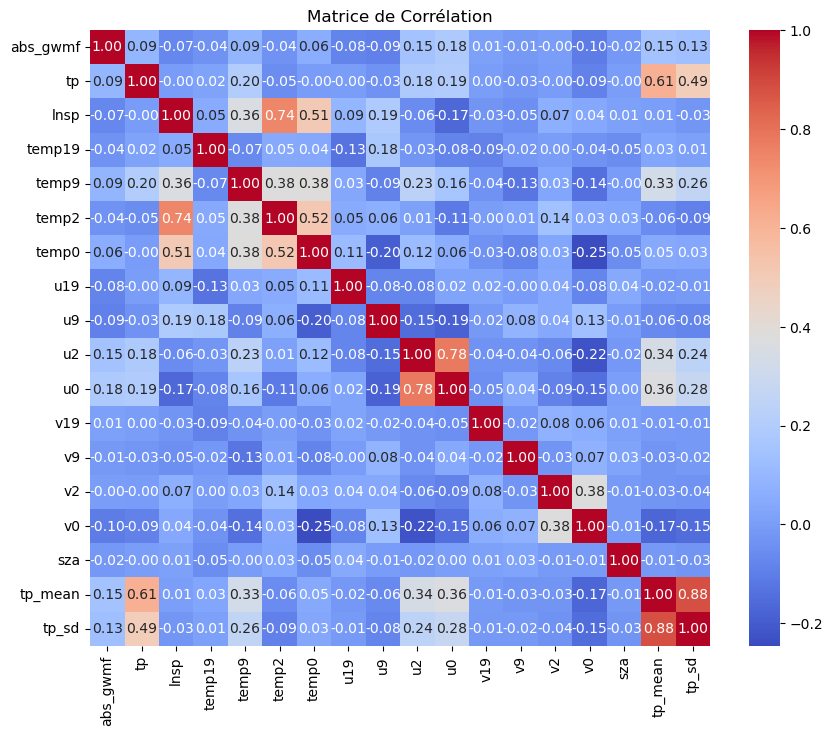

In [184]:
"""Matrice de corrélation des variables"""

import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

# Créer un heatmap de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation')
plt.savefig('matrice_corr.jpeg')  # Vous pouvez changer le format ici si besoin
plt.show()

## **2) Modélisation : comparaison des approches paramétriques (régression, Lasso) et non-paramétriques (Random-Forest)**

In [185]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LassoCV, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import add_dummy_feature
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingRegressor

In [186]:
"""Normalisation des données"""

# Séparation des données en variables explicatives (X) et variable cible (y)
X = df.drop('abs_gwmf', axis=1)
y = df['abs_gwmf']

# Séparation des données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Ajout d'une constante à X_train_normalized et X_test_normalized
X_train_normalized = sm.add_constant(X_train_normalized)
X_test_normalized = sm.add_constant(X_test_normalized)

In [124]:
"""Régression linéaire simple"""

def regression_lineaire_multivariable(dvf, variable_a_expliquer, variables_explicatives):    
    # Séparer la variable dépendante et les variables indépendantes
    y = dvf[variable_a_expliquer].copy()
    X = dvf[variables_explicatives].copy()

    column_names = X.columns
    
    X = scaler.fit_transform(X)
    X = pd.DataFrame(X, columns=column_names)

    X = sm.add_constant(X)


    # Initialiser le modèle de régression linéaire avec des estimateurs de variance robustes
    model = sm.OLS(y, X).fit(cov_type='HC3')

    # Afficher les résultats de la régression
    print(model.summary())


In [125]:
var_base = ['tp', 'lnsp', 'temp19', 'temp9', 'temp2', 'temp0', 'u19',
       'u9', 'u2', 'u0', 'v19', 'v9', 'v2', 'v0', 'sza', 'tp_mean', 'tp_sd']

regression_lineaire_multivariable(df, 'abs_gwmf', var_base)

                            OLS Regression Results                            
Dep. Variable:               abs_gwmf   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     79.79
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          9.37e-267
Time:                        08:19:08   Log-Likelihood:                 82331.
No. Observations:               16197   AIC:                        -1.646e+05
Df Residuals:                   16179   BIC:                        -1.645e+05
Df Model:                          17                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010   1.18e-05     83.829      0.0

1.520328050121885e-06


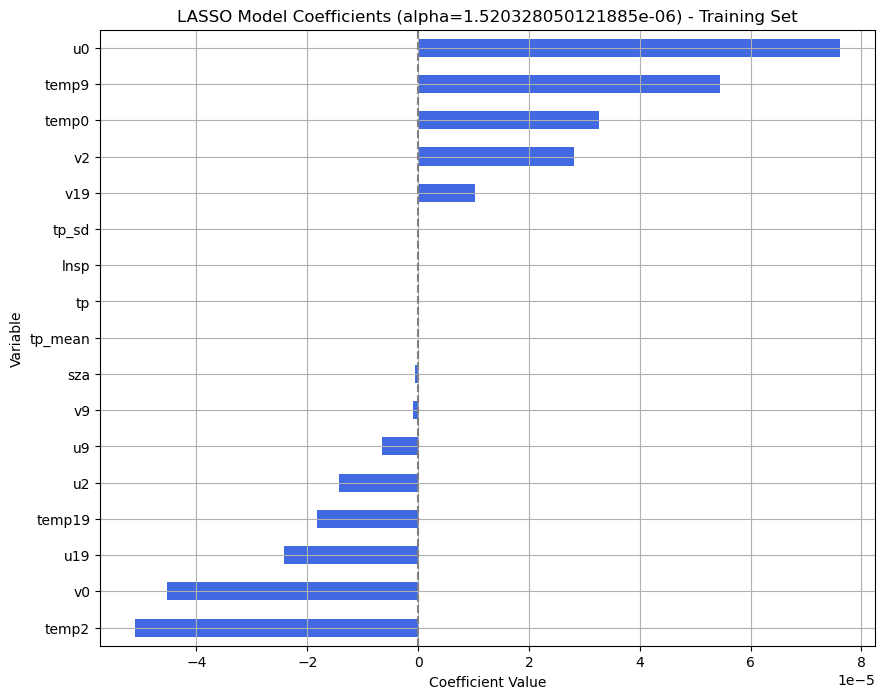

In [132]:
"""Régression LASSO"""

lasso_cv_model = models['Lasso Regression'].fit(X_train, y_train)

print(lasso_cv_model.alpha_)

# Extraire les coefficients du modèle Lasso
lasso_coefficients = pd.Series(lasso_cv_model.coef_, index=X_train.columns)

# Trier les coefficients par valeur
lasso_coefficients_sorted = lasso_coefficients.sort_values()

# Tracer un graphique de barres horizontales pour les coefficients
plt.figure(figsize=(10, 8))
lasso_coefficients_sorted.plot(kind='barh', color='royalblue')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title(f'LASSO Model Coefficients (alpha={lasso_cv_model.alpha_}) - Training Set')
plt.xlabel('Coefficient Value')
plt.ylabel('Variable')
plt.grid(True)
plt.show()

In [152]:
""" Récupération des variables choisies par l'algorithme random forest """

# Train the Random Forest model
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)

feature_names = X_train.columns
feature_importances = random_forest.feature_importances_

# Combine feature names and importances into a dictionary
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort feature importance dictionary by importance values (optional)
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print feature names and their importances
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

top_10_features = [feature for feature, importance in sorted_feature_importance[:10]]
top_10_features

u19: 0.1316480180795762
temp2: 0.07982095225601953
u0: 0.0787110992027122
tp_sd: 0.07532767756222691
lnsp: 0.0721329413426429
temp0: 0.057289518907097034
u2: 0.056413849806508494
temp19: 0.0562811636884862
sza: 0.05103293786497988
u9: 0.04902346009874214
v0: 0.047699520421028575
v9: 0.04678651722406743
v19: 0.04337603406202387
tp: 0.041147198635133005
temp9: 0.04027227342406471
tp_mean: 0.03680646615043026
v2: 0.03623037127426056


In [187]:
var_random_forest = ['u19', 'temp2', 'u0', 'tp_sd', 'lnsp', 'temp0', 'u2', 'temp19', 'sza', 'u9']

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Définir les hyperparamètres à rechercher avec Randomized Search
random_params = {
    'n_estimators': randint(100, 1000),
    'max_features': ['auto', 'sqrt'],
    'max_depth': randint(10, 100),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

# Créer un modèle Random Forest
rf = RandomForestRegressor(random_state=42)

# Recherche aléatoire des meilleurs hyperparamètres
random_search = RandomizedSearchCV(rf, param_distributions=random_params, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

# Obtenez les meilleurs paramètres trouvés par Randomized Search
best_random_params = random_search.best_params_

# Définir une grille plus précise autour des meilleurs paramètres trouvés
param_grid = {
    'n_estimators': [best_random_params['n_estimators'] - 50, best_random_params['n_estimators'], best_random_params['n_estimators'] + 50],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [best_random_params['max_depth'] - 10, best_random_params['max_depth'], best_random_params['max_depth'] + 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True]
}

# Recherche en grille des meilleurs hyperparamètres autour des meilleurs paramètres trouvés par Randomized Search
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Obtenez les meilleurs paramètres trouvés par Grid Search
best_params = grid_search.best_params_

# Créer un nouveau modèle Random Forest avec les meilleurs paramètres
best_rf_model = RandomForestRegressor(**best_params)


In [188]:
"""Initialisation des modèles à comparer"""

models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': LassoCV(cv=KFold(n_splits=10, shuffle=True, random_state=42)),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'KNN' : KNeighborsRegressor()
}

In [163]:
"""Entrainement des modèles et stockage des erreurs RMSE"""

# Dictionnaire pour stocker les erreurs RMSE pour chaque modèle
rmse_errors = {name: [] for name in models}

# Sélectionner les variables pour KNN
X_train_knn = X_train[var_random_forest]

# Dictionnaire pour stocker les erreurs RMSE pour chaque modèle
rmse_errors = {name: [] for name in models}

# Boucle sur chaque modèle
for name, model in models.items():
    if name == 'KNN':
        # Utiliser seulement les variables sélectionnées pour KNN
        rmse_scores = cross_val_score(model, X_train_knn, y_train, cv=10, scoring='neg_root_mean_squared_error')
    else:
        # Utiliser toutes les variables pour les autres modèles
        rmse_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
    
    rmse_errors[name] = -rmse_scores  # Convertir en valeurs positives

In [191]:
"""Autres erreurs"""
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, cross_val_predict


# Dictionnaire pour stocker les autres métriques d'évaluation
other_metrics = {name: {'MAE': [], 'MAPE': [], 'R^2': [], 'Max Absolute Error': []} for name in models}

# Boucle sur chaque modèle
for name, model in models.items():
    if name == 'KNN':
        # Utiliser seulement les variables sélectionnées pour KNN
        predictions = cross_val_predict(model, X_train_knn, y_train, cv=10)
    else:
        # Utiliser toutes les variables pour les autres modèles
        predictions = cross_val_predict(model, X_train, y_train, cv=10)
    
    # Calculer les métriques d'évaluation
    mae = mean_absolute_error(y_train, predictions)
    mape = mean_absolute_percentage_error(y_train, predictions)
    r2 = r2_score(y_train, predictions)
    max_absolute_error = max(np.abs(y_train - predictions))
    
    # Stocker les métriques dans le dictionnaire
    other_metrics[name]['MAE'] = mae
    other_metrics[name]['MAPE'] = mape
    other_metrics[name]['R^2'] = r2
    other_metrics[name]['Max Absolute Error'] = max_absolute_error

In [195]:

# Convertir le dictionnaire other_metrics en DataFrame
other_metrics_df = pd.DataFrame(other_metrics)
    


In [196]:
other_metrics_df.head()

Linear Regression  Lasso Regression  Random Forest  \
MAE                      6.832559e-04      6.869844e-04   5.495080e-04   
MAPE                     1.100738e+11      1.063347e+11   1.111608e+11   
R^2                      6.212335e-02      5.841916e-02   2.751838e-01   
Max Absolute Error       7.137646e-02      7.146695e-02   7.011622e-02   

                    Gradient Boosting           KNN  
MAE                      6.343848e-04  7.406813e-04  
MAPE                     1.122954e+11  9.489124e+10  
R^2                      1.403978e-01 -9.970099e-02  
Max Absolute Error       7.139835e-02  7.145819e-02

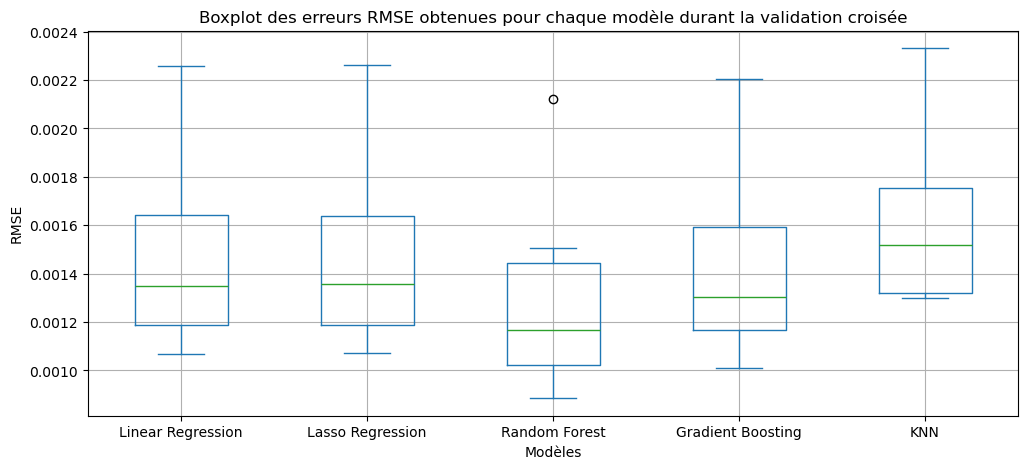

In [164]:
"""Observation de la distribution des erreurs pour chaques modèles"""

scores = pd.DataFrame(rmse_errors)

# Tracer un boxplot pour la variation des valeurs RMSE pour chaque modèle
scores.plot(kind='box', 
            title='Boxplot des erreurs RMSE obtenues pour chaque modèle durant la validation croisée',
            figsize=(12, 5))
plt.ylabel('RMSE')
plt.xlabel('Modèles')
plt.grid(True)
plt.show()